<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time series seasonal - exercises

--- 

In [1]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The following dataset contains seasonally non-adjusted quarterly data on income and consumption in the UK.

In [3]:
df = pd.read_csv('datasets/IncomeUK.csv')

In [4]:
df.head()

income  consumption
0    9014         8016
1    9659         8798
2    9848         9184
3   10316         9755
4   10254         9113

### 0. The values represent quarterly data from 01/01/1971 to 30/06/1985.

Create the corresponding datetime index.

In [5]:
df['date'] = pd.date_range(start='1971-01-01',end='1985-06-30',freq='Q')
df.set_index('date', inplace=True, drop=True)
df.index.name = None

df.head()

income  consumption
1971-03-31    9014         8016
1971-06-30    9659         8798
1971-09-30    9848         9184
1971-12-31   10316         9755
1972-03-31   10254         9113

### 1. Describe the behaviour of consumption. 

What types of differencing, seasonal, non-seasonal, or both, would you recommend? Do you recommend fitting a seasonal ARIMA model to the data with or without a log transformation? Consider using ACF plots, decomposition into seasonal and non-seasonal parts and the Dickey-Fuller test to help answer these question.

### 2. Plot the time series for consumption. Which order of differencing would you recommend?

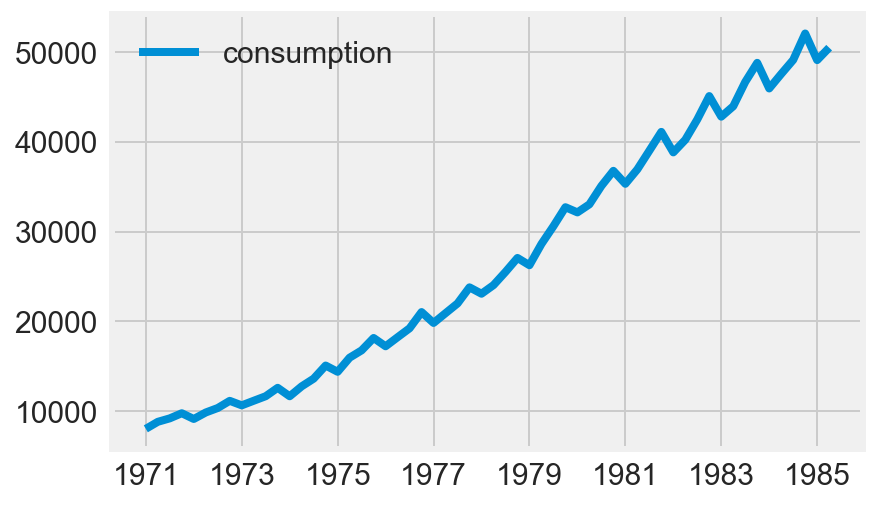

In [6]:
df[['consumption']].plot()
plt.show()

### 3. Look at the autocorrelations and partial autocorrelations of consumption and log consumption. Describe.

In [7]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1], method='ywmle')
    return fig, ax

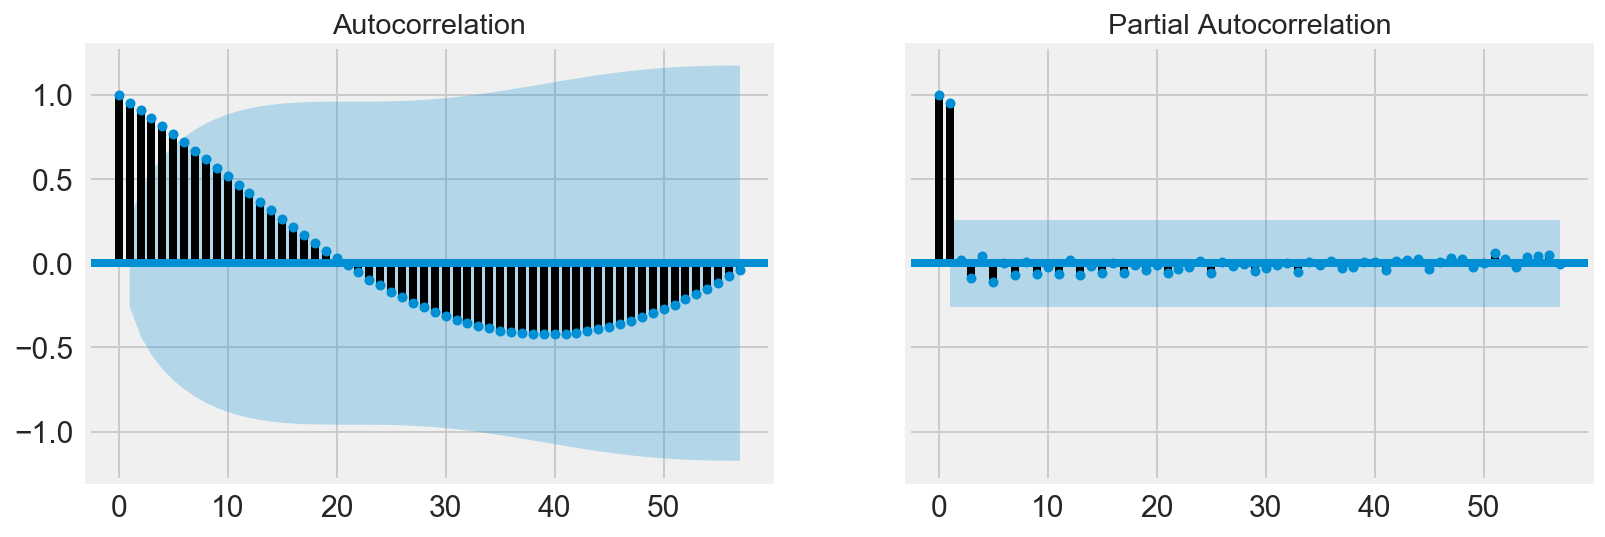

In [8]:
fig, ax = autocorr_plots(df['consumption'])

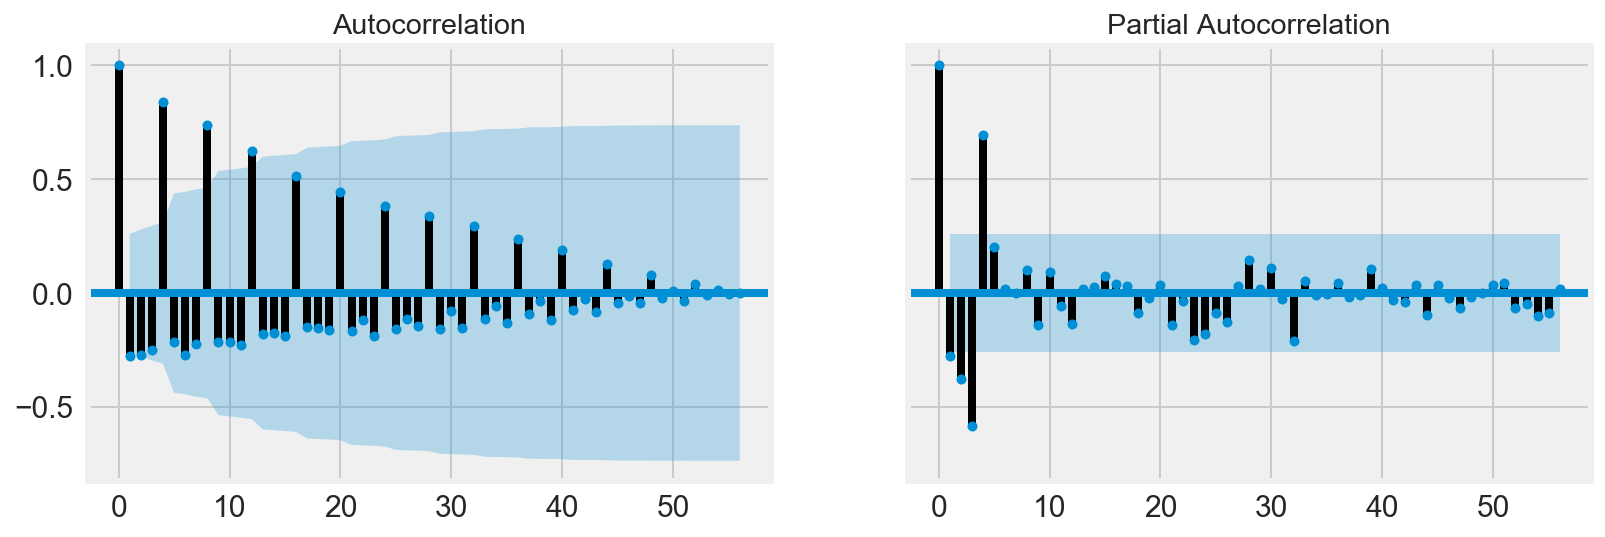

In [9]:
fig, ax = autocorr_plots(df['consumption'].diff()[1:])

### 4. Decompose into seasonal and non-seasonal parts

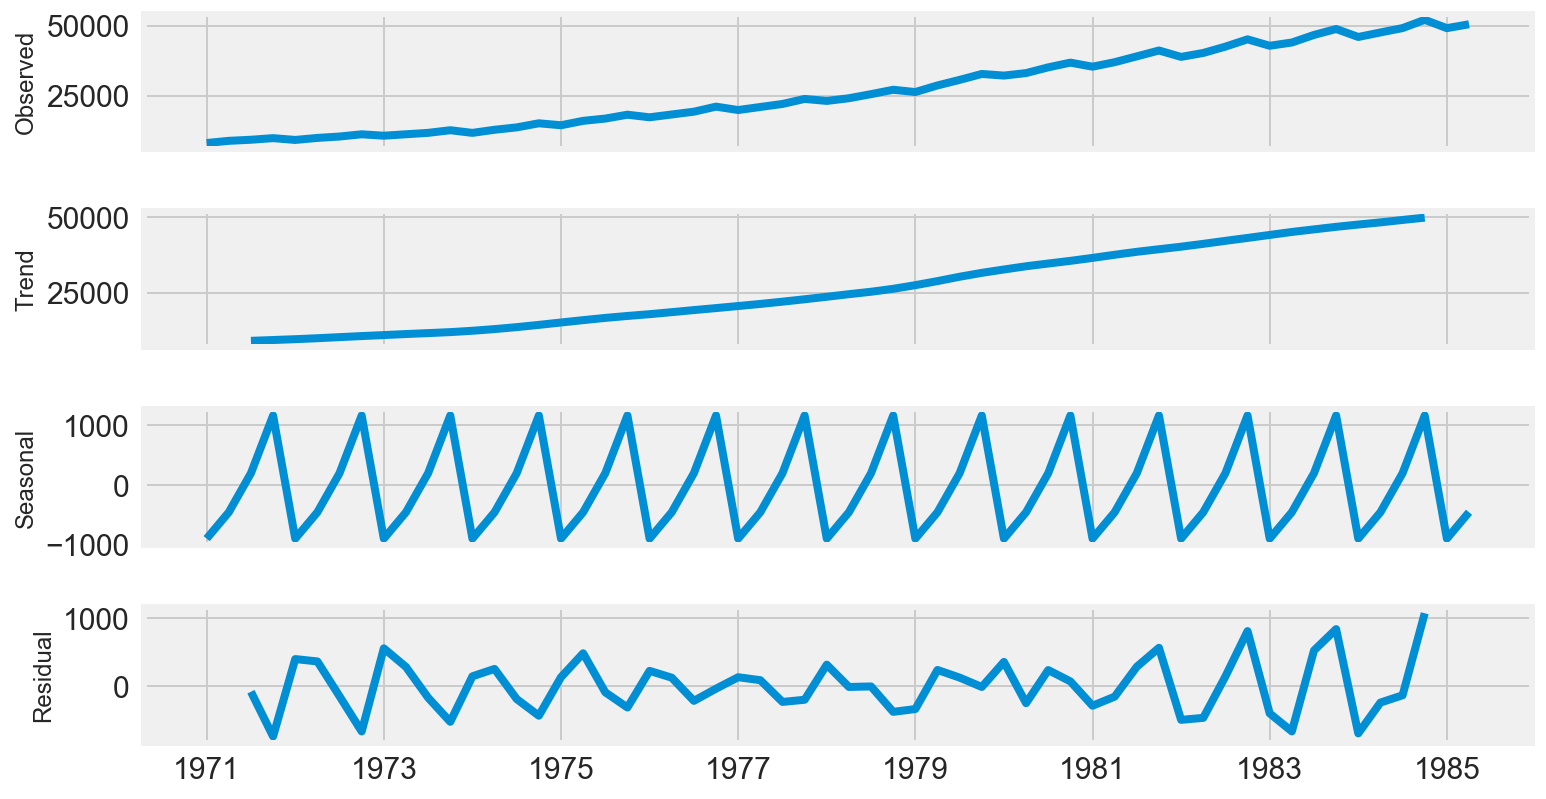

In [10]:
decomposition = seasonal_decompose(df.consumption,freq=4)  
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

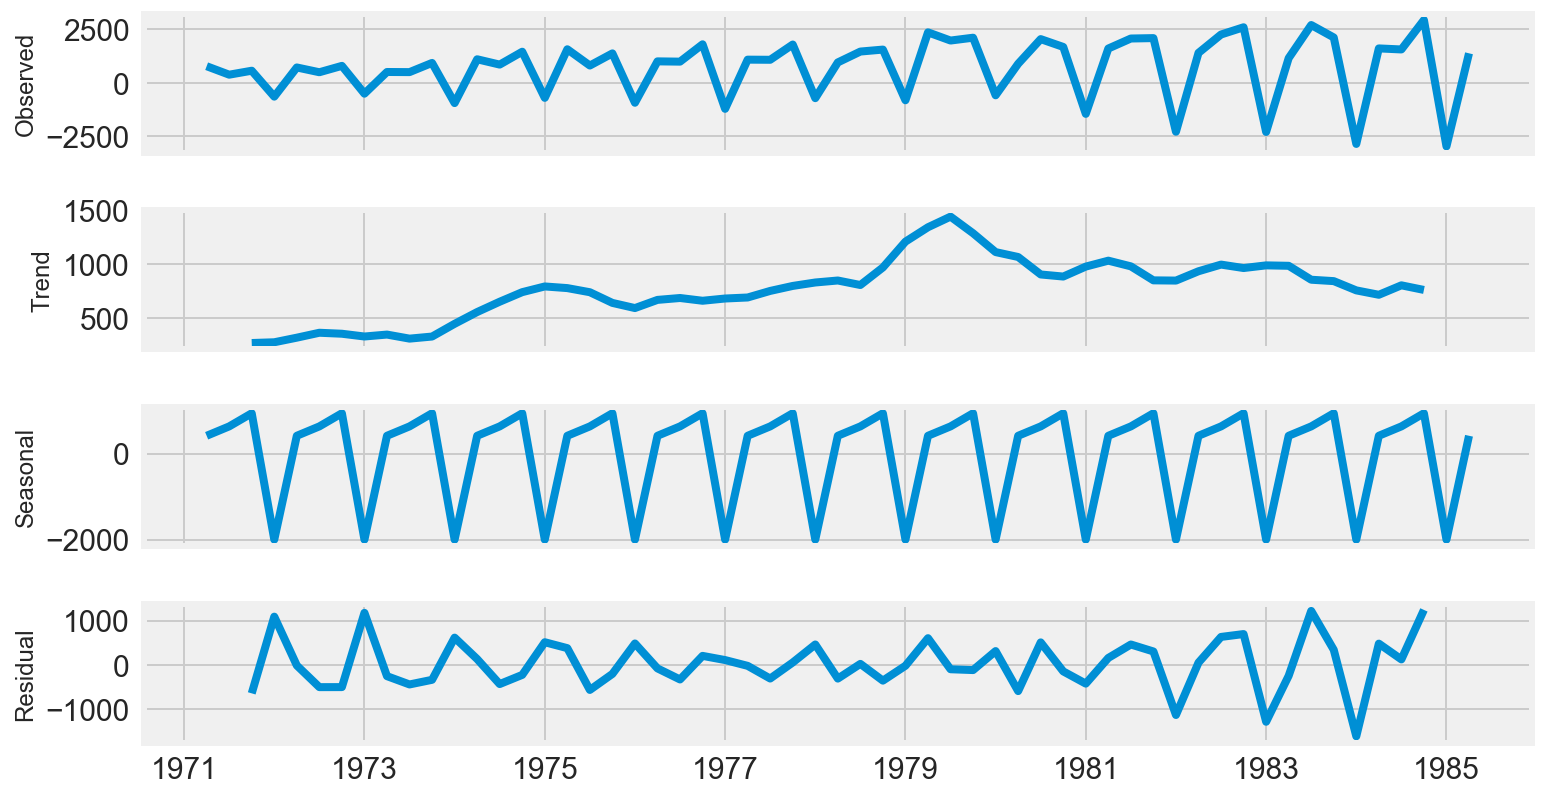

In [11]:
decomposition = seasonal_decompose(df.consumption.diff()[1:],freq=4)  
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

### 5. Perform a Dickey-Fuller test for stationarity on consumption and its differences.

In [12]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,maxlag=None,regression='c',autolag='AIC'):
    '''Perform Dickey-Fuller test and print out results'''
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,maxlag=maxlag,regression=regression,autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

def rolling(timeseries,window=12,center=True,figsize=(12,8)):
    '''Plot original timeseries, rolling mean over given window size and rolling 
    mean plus/minus standard deviation'''
    
    rolmean = timeseries.rolling(window=window, center=center).mean()
    rolstd = timeseries.rolling(window=window, center=center).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=figsize)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std_plus = plt.plot(rolmean+rolstd, color='red',ls='--', label = 'Rolling Mean +/- Rolling Std')
    std_minus = plt.plot(rolmean-rolstd, color='red',ls='--',label= '')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()  

def autocorrelation_plot(timeseries,lags=None):
    '''Plot autocorrelations and partial autocorrelations'''
    fig, ax = plt.subplots(ncols=2,figsize=(12,4))
    plot_acf(timeseries, lags=lags, ax=ax[0])
    plot_pacf(timeseries, lags=lags, ax=ax[1], method='ywmle')
    plt.show()

def test_and_vis(timeseries):
    '''Perform Dickey-Fuller test, plot timeseries with rolling mean and autocorrelations'''
    test_stationarity(timeseries.dropna())
    rolling(timeseries)
    autocorrelation_plot(timeseries.dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -0.334698
p-value                         0.920444
#Lags Used                      8.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


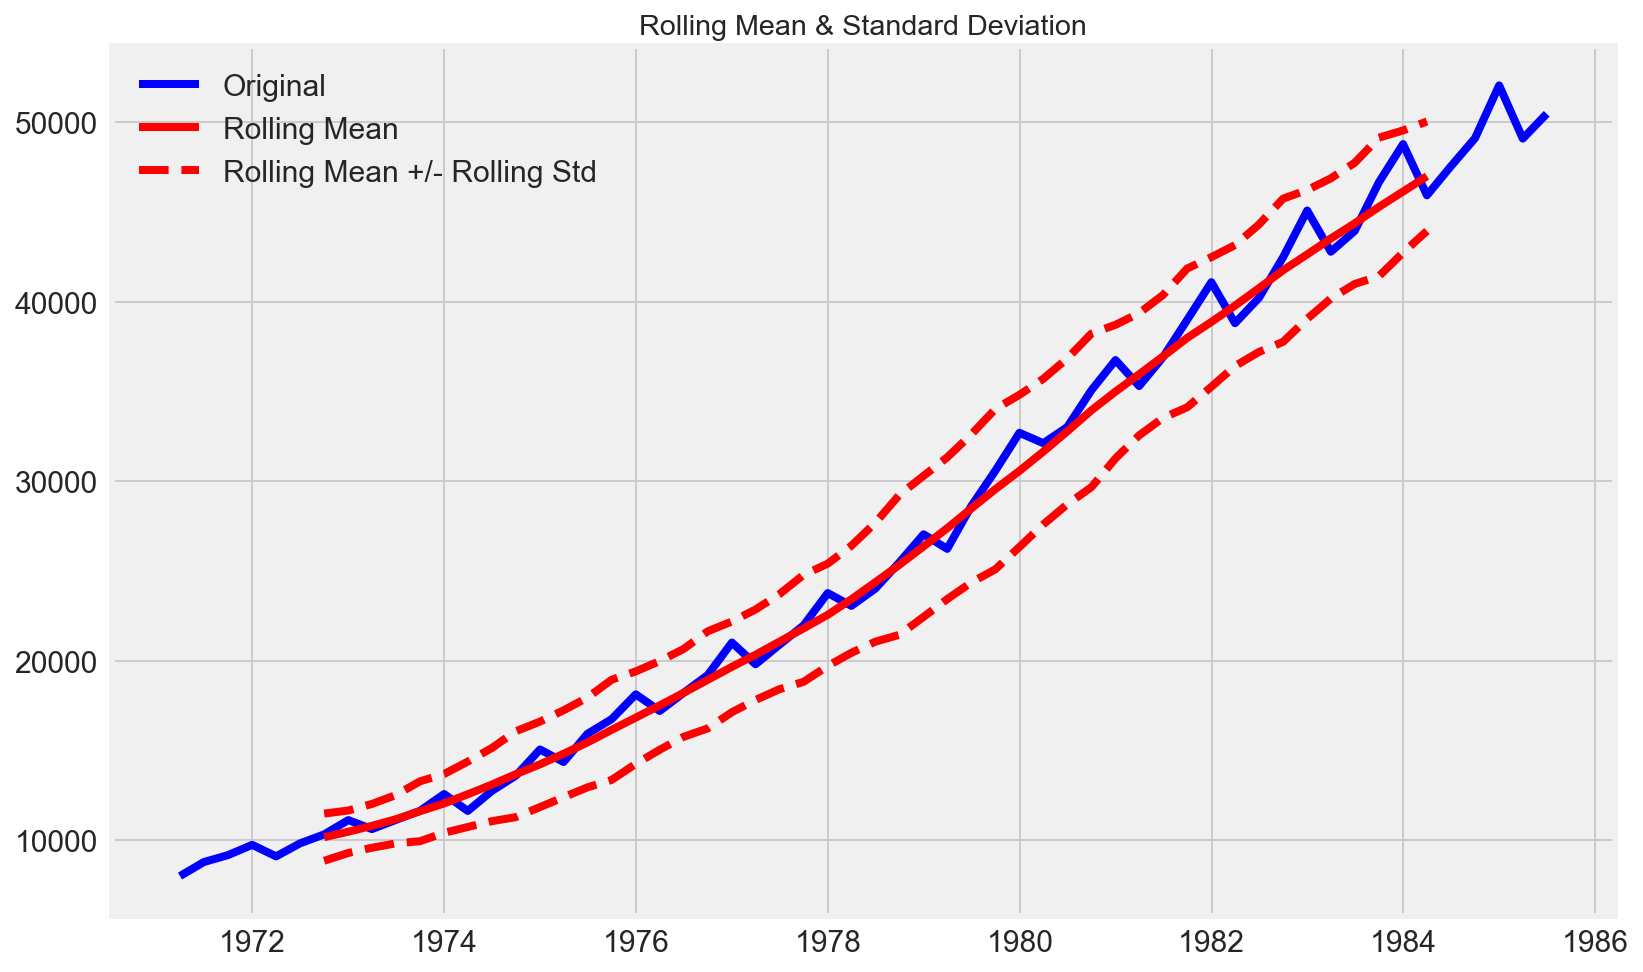

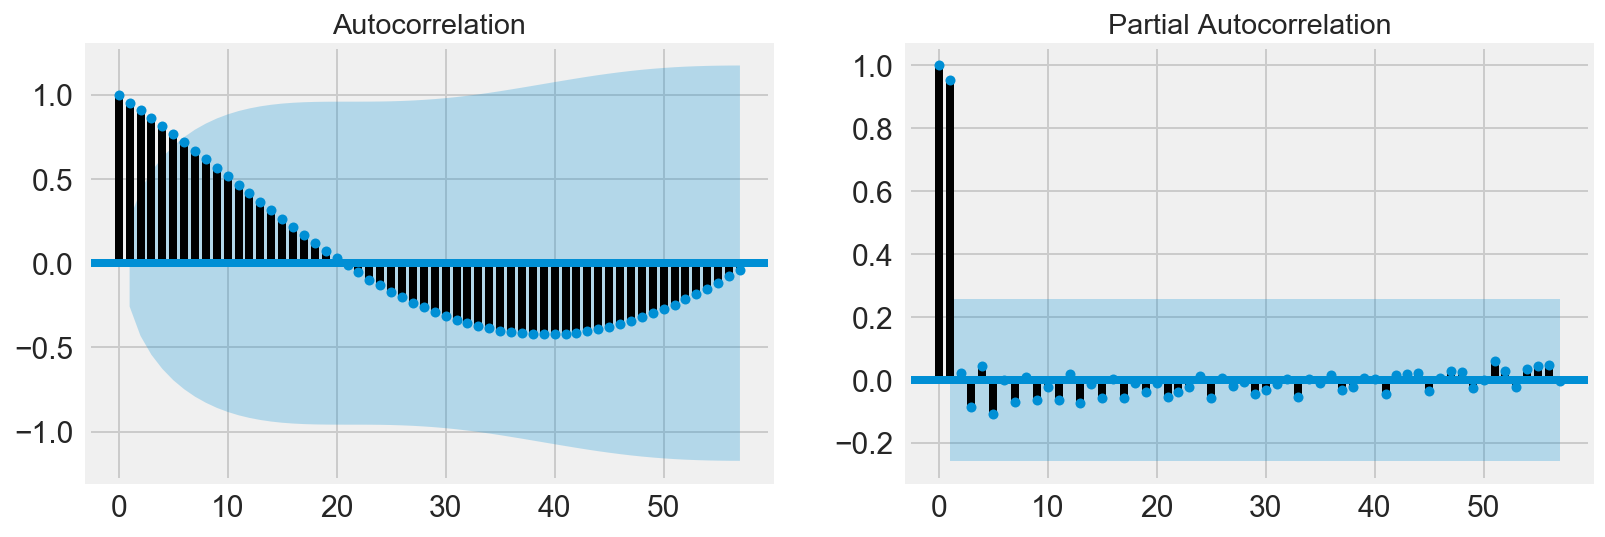

In [13]:
test_and_vis(df.consumption)

Results of Dickey-Fuller Test:
Test Statistic                 -1.647875
p-value                         0.458149
#Lags Used                      7.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


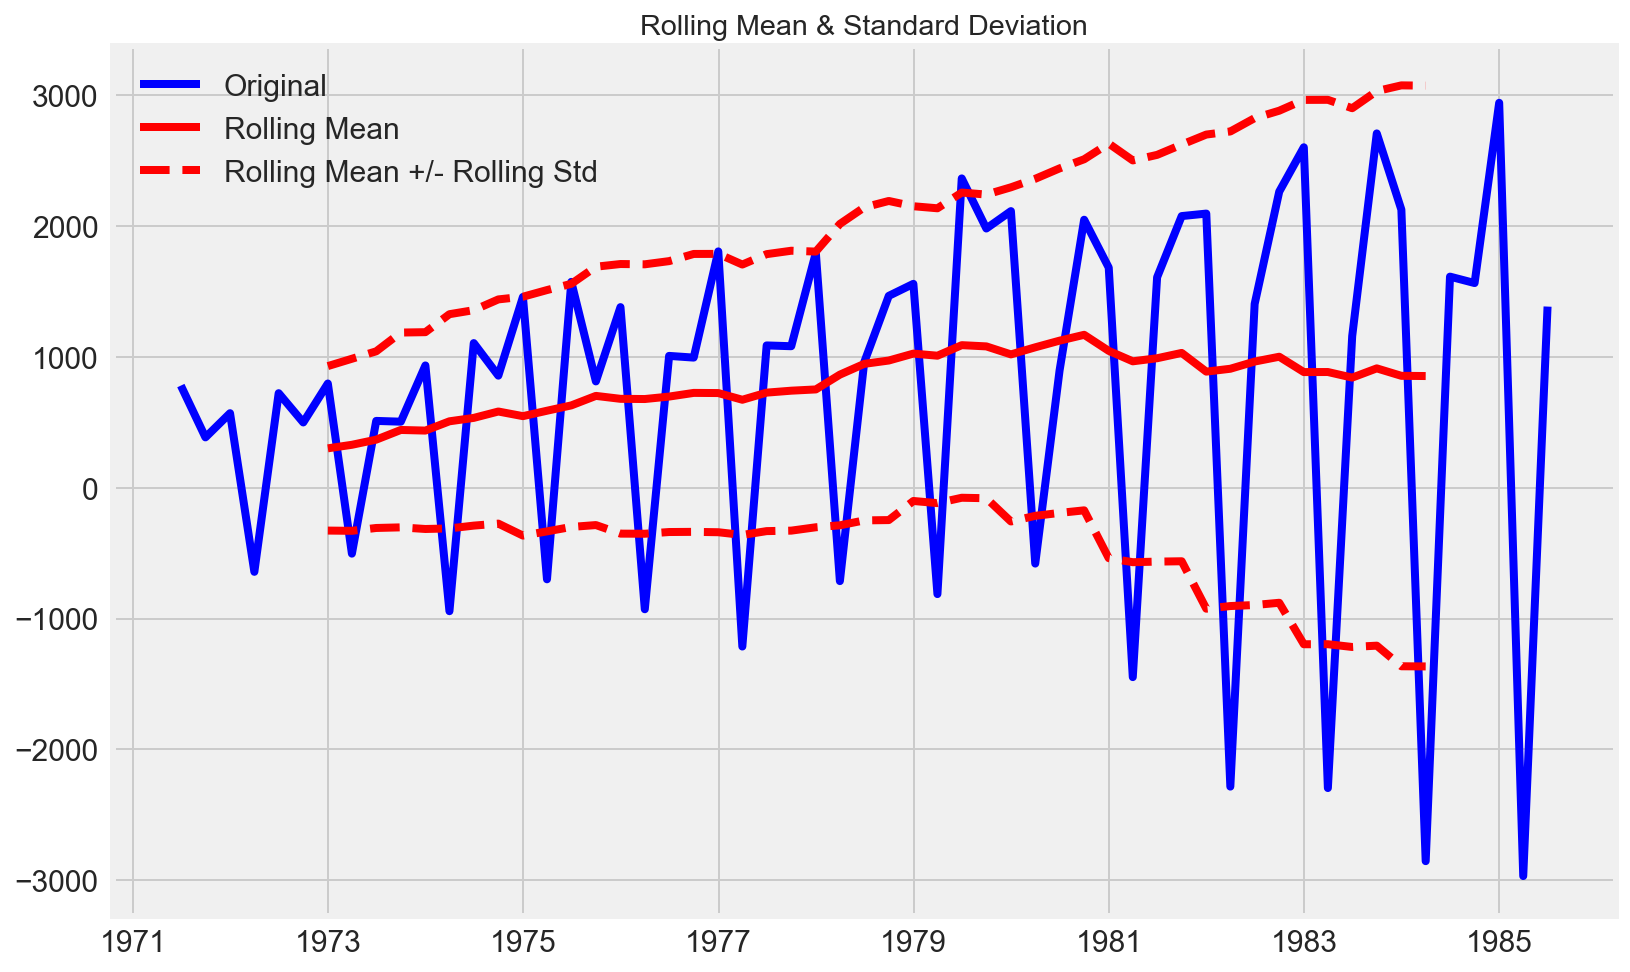

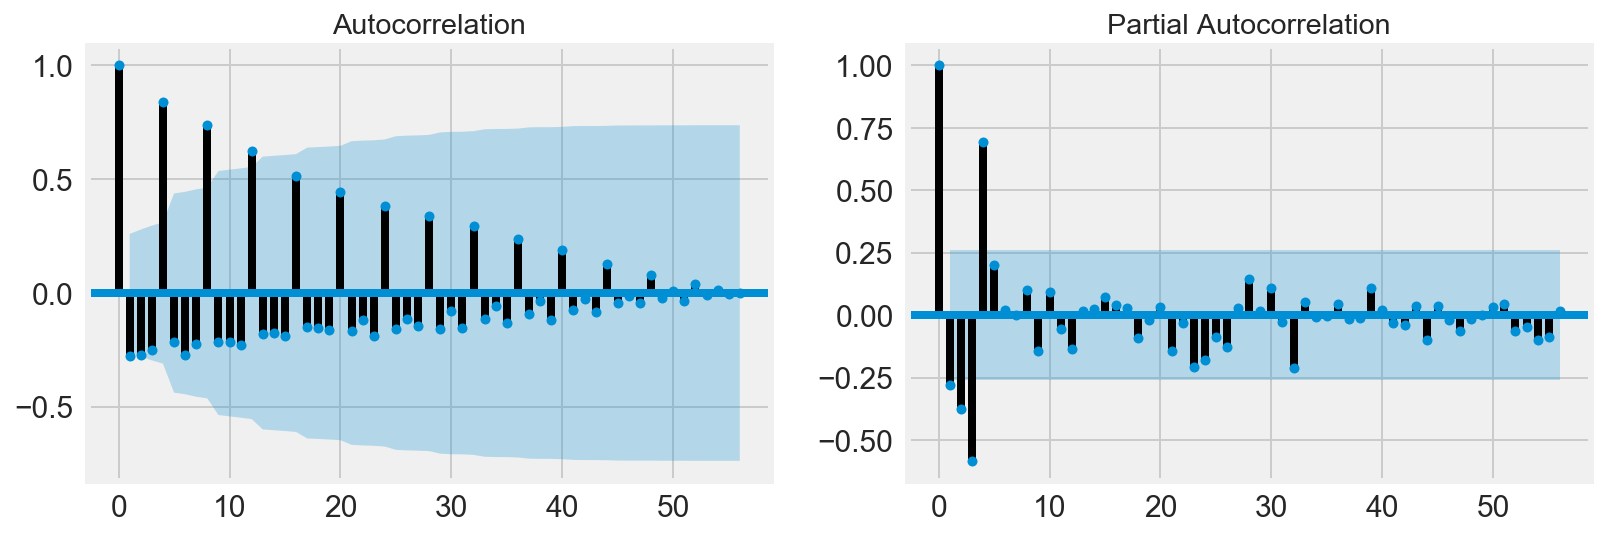

In [14]:
test_and_vis(df.consumption.diff(1)[1:])

Results of Dickey-Fuller Test:
Test Statistic                 -5.135772
p-value                         0.000012
#Lags Used                      6.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


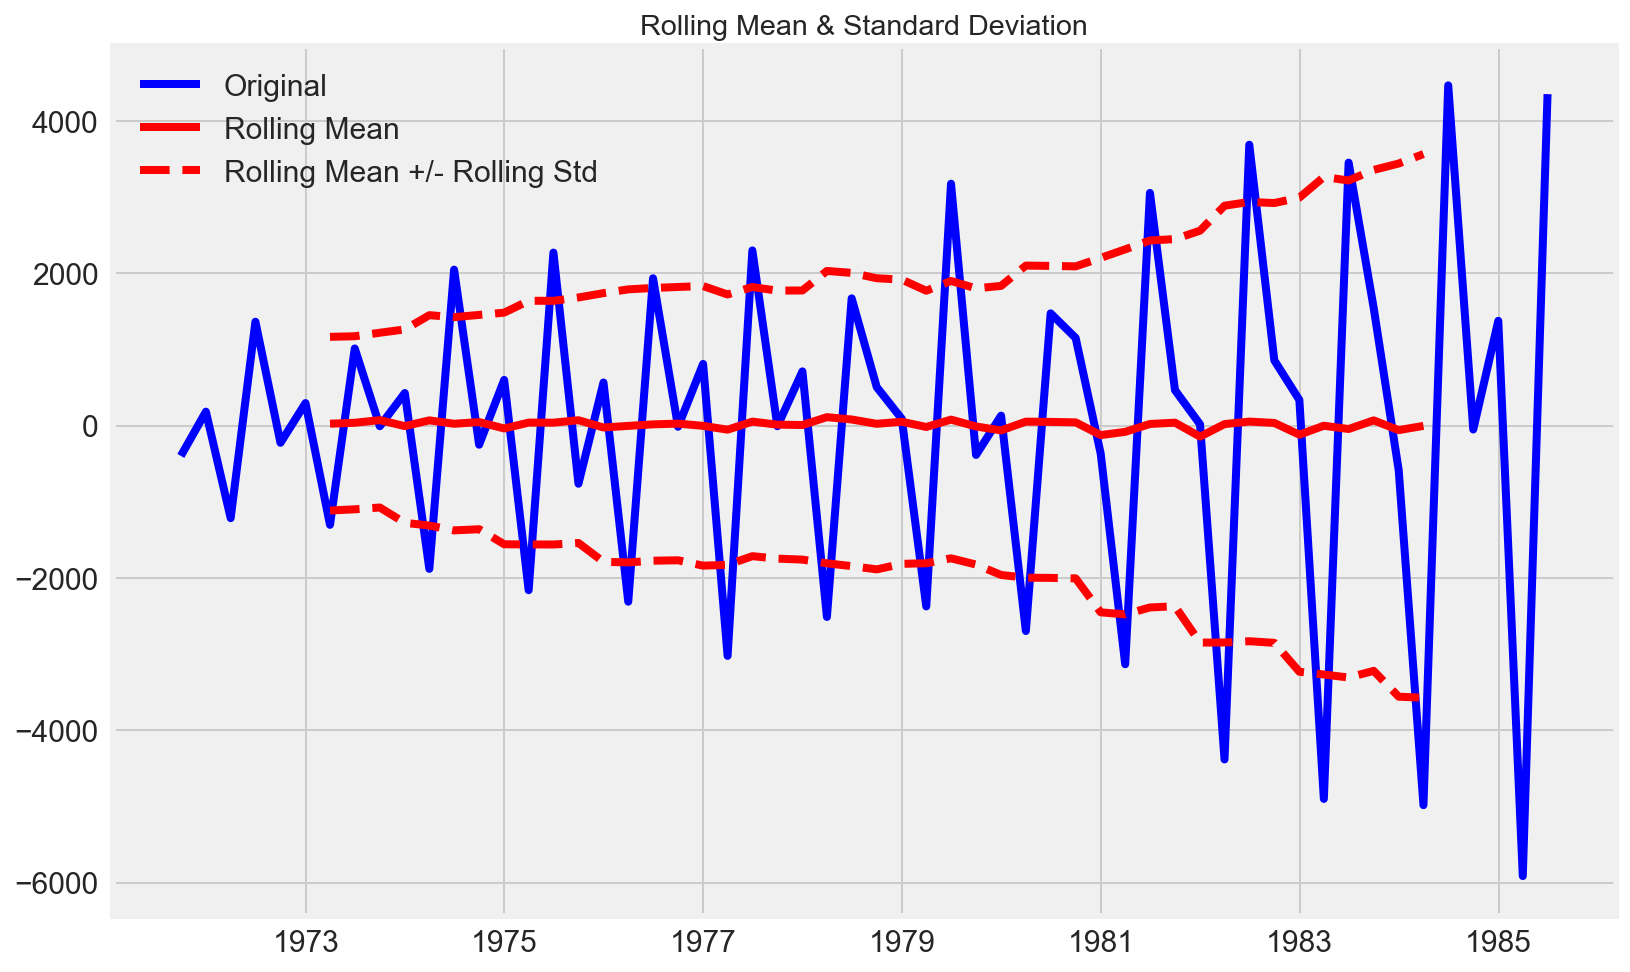

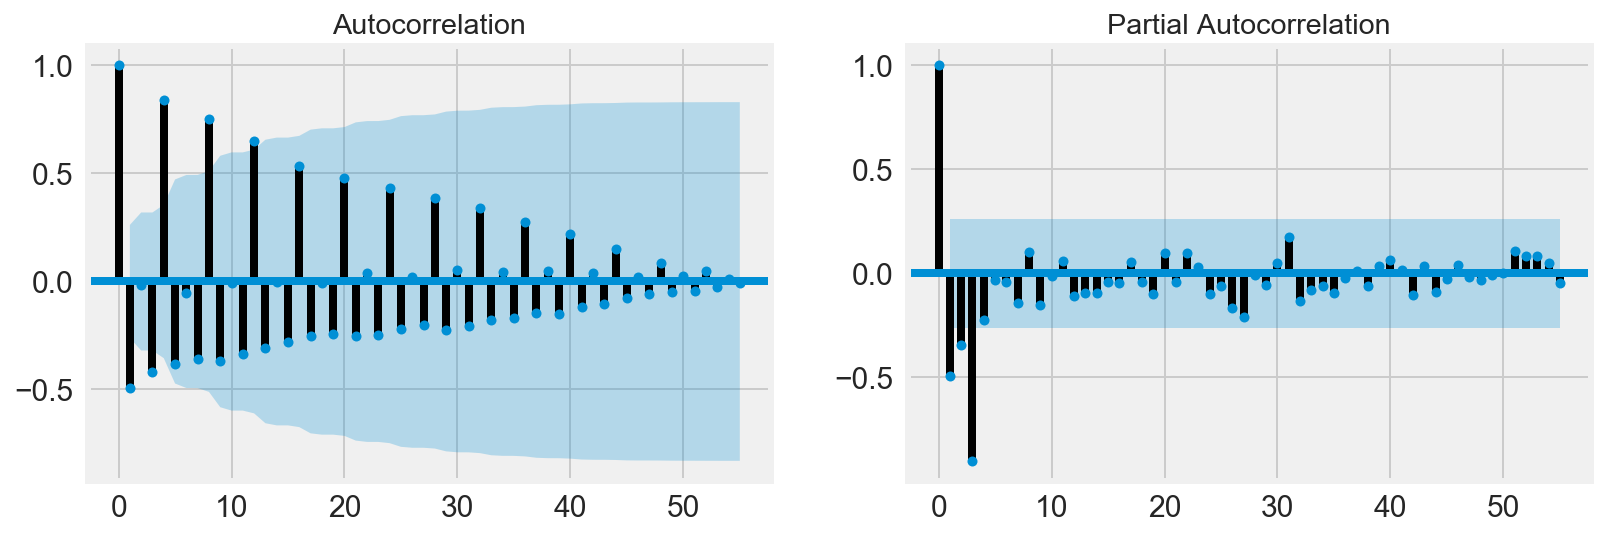

In [15]:
test_and_vis(df.consumption.diff().diff()[2:])

### 6. Do you get better results in the Dickey-Fuller test if you take into account seasonality effects?

Results of Dickey-Fuller Test:
Test Statistic                 -4.817405
p-value                         0.000050
#Lags Used                      3.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


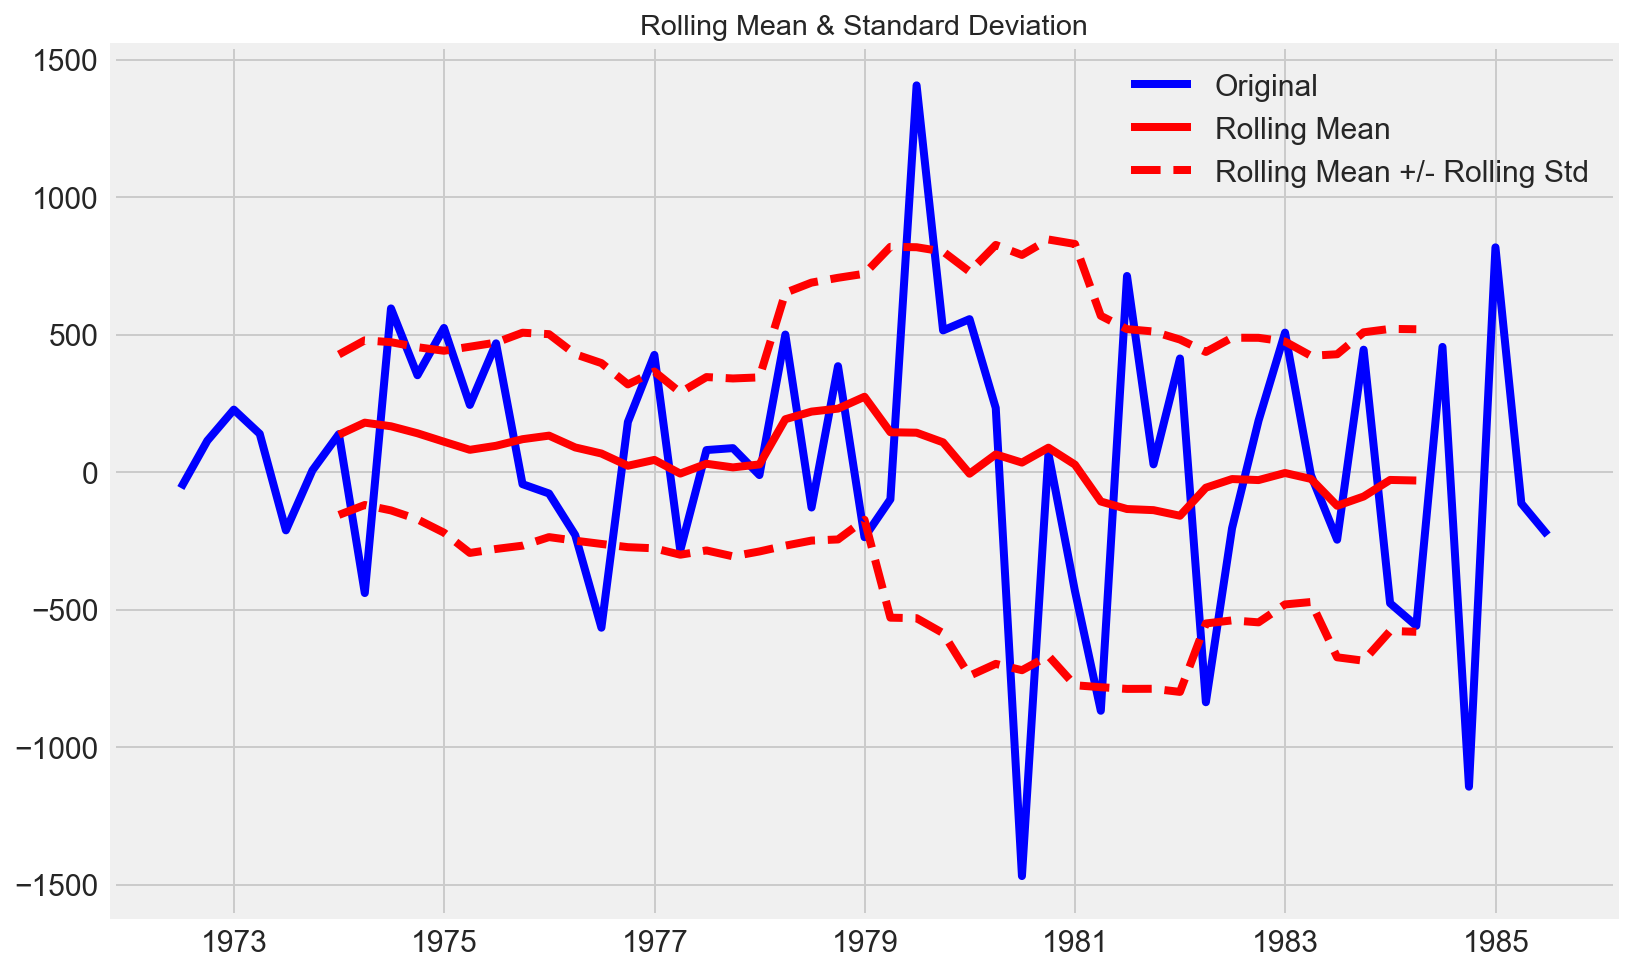

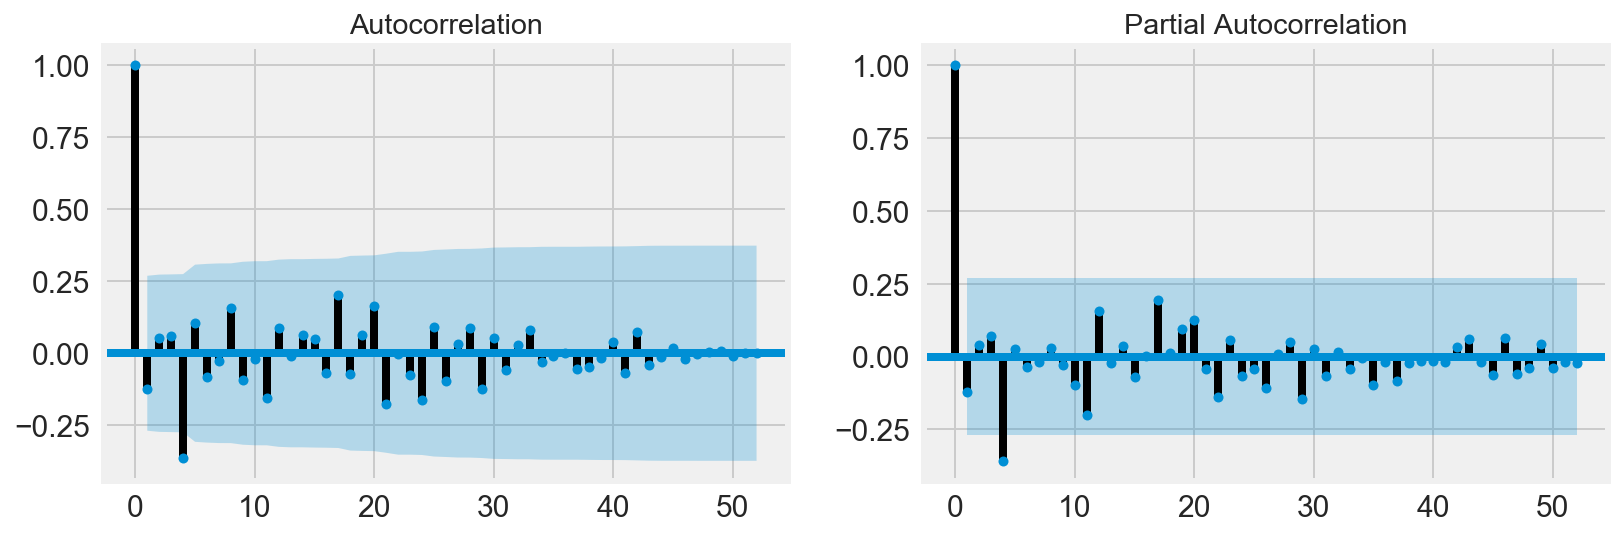

In [16]:
test_and_vis((df.consumption.diff()-df.consumption.diff().shift(4))[5:])

### 7. Irrespective of your previous answers, fit a SARIMA model to consumption. Which parameters did you choose for the non-seasonal and seasonal components?

In [17]:
import statsmodels.api as sm

In [33]:
model = sm.tsa.statespace.SARIMAX(df.consumption.values, order=(0,1,1), 
                                  seasonal_order=(0,1,1,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   58
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -401.285
Date:                           Thu, 23 Aug 2018   AIC                            808.570
Time:                                   11:35:43   BIC                            814.481
Sample:                                        0   HQIC                           810.843
                                            - 58                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0728      0.137     -0.530      0.596      -0.342       0.196
ma.S.L4       -0.2522      0.114     -2.203      0.028      -0.477      -0.028
sigma2      2.162e+05   3.82e+04      5.656      0.000    1.41e+05    2.91e+05
===================================================================================
Ljung-Box (Q):                       27.21   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.94   Prob(JB):                         0.48
Heteroskedasticity (H):               2.56   Skew:                            -0.24
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model = sm.tsa.statespace.SARIMAX(df.consumption.values, order=(2,2,0), 
                                  seasonal_order=(1,1,0,4))
results = model.fit(maxiter=2000)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   58
Model:             SARIMAX(2, 2, 0)x(1, 1, 0, 4)   Log Likelihood                -403.419
Date:                           Thu, 23 Aug 2018   AIC                            814.839
Time:                                   11:28:36   BIC                            822.644
Sample:                                        0   HQIC                           817.831
                                            - 58                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6019      0.098     -6.121      0.000      -0.795      -0.409
ar.L2         -0.2491      0.106     -2.342      0.019      -0.458      -0.041
ar.S.L4       -0.3209      0.113     -2.828      0.005      -0.543      -0.098
sigma2      2.773e+05   5.83e+04      4.759      0.000    1.63e+05    3.91e+05
===================================================================================
Ljung-Box (Q):                       38.63   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.53   Prob(JB):                         0.85
Heteroskedasticity (H):               1.97   Skew:                            -0.20
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
models = []
results = []
results_scores = []
max = 4
for p in range(3):
    for q in range(2):
        for p_s in range(3):
            for q_s in range(2):
                try:
                    model = sm.tsa.statespace.SARIMAX(df.consumption.values, 
                                      order=(p,1,q), 
                                      seasonal_order=(p_s,1,q_s,4))
                    result = model.fit()
                    models.append(model)
                    results.append(result)
                    results_scores.append([p,q,p_s,q_s,result.aic,result.bic])
                except:
                    results_scores.append([p,q,p_s,q_s,np.nan,np.nan])

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
results_scores

[[0, 0, 0, 0, 810.2145812046817, 812.1848731182339],
 [0, 0, 0, 1, 806.9270965704387, 810.8676803975429],
 [0, 0, 1, 0, 805.0221289943033, 808.9627128214075],
 [0, 0, 1, 1, 806.7901519991852, 812.7010277398416],
 [0, 0, 2, 0, 806.5510124557196, 812.461888196376],
 [0, 0, 2, 1, 804.639450359636, 812.5206180138446],
 [0, 1, 0, 0, 811.7083829693418, 815.648966796446],
 [0, 1, 0, 1, 808.5702039291847, 814.481079669841],
 [0, 1, 1, 0, 806.8355660005346, 812.746441741191],
 [0, 1, 1, 1, 808.6171275498458, 816.4982952040543],
 [0, 1, 2, 0, 808.4109288999432, 816.2920965541517],
 [0, 1, 2, 1, 806.4219235163481, 816.2733830841087],
 [1, 0, 0, 0, 811.6850447963092, 815.6256286234134],
 [1, 0, 0, 1, 808.5527430795835, 814.4636188202398],
 [1, 0, 1, 0, 806.8225777294883, 812.7334534701447],
 [1, 0, 1, 1, 808.6027753229181, 816.4839429771266],
 [1, 0, 2, 0, 808.3972434531055, 816.278411107314],
 [1, 0, 2, 1, 806.6506180354563, 816.5020776032169],
 [1, 1, 0, 0, 813.6585797548381, 819.5694554954945],

In [22]:
results_scores = np.array(results_scores)
results_scores = results_scores[results_scores[:,4]>0]

In [23]:
best_params_aic = results_scores[results_scores[:,4].argmin()][:4]
best_params_bic = results_scores[results_scores[:,5].argmin()][:4]

print("Best parameters AIC:", results_scores[:,4].argmin(), best_params_aic)
print("Best parameters BIC:", results_scores[:,5].argmin(), best_params_bic)

Best parameters AIC: 5 [0. 0. 2. 1.]
Best parameters BIC: 2 [0. 0. 1. 0.]


In [24]:
model_ex = sm.tsa.statespace.SARIMAX(df.consumption.values, order=(0,1,0), 
                                  seasonal_order=(2,1,1,4))
results_ex = model_ex.fit()
results_ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   58
Model:             SARIMAX(0, 1, 0)x(2, 1, 1, 4)   Log Likelihood                -398.320
Date:                           Thu, 23 Aug 2018   AIC                            804.639
Time:                                   11:28:41   BIC                            812.521
Sample:                                        0   HQIC                           807.670
                                            - 58                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.5739      0.134      4.272      0.000       0.311       0.837
ar.S.L8        0.4258      0.129      3.306      0.001       0.173       0.678
ma.S.L4       -0.9920      0.189     -5.242      0.000      -1.363      -0.621
sigma2       1.95e+05   1.05e-06   1.86e+11      0.000    1.95e+05    1.95e+05
===================================================================================
Ljung-Box (Q):                       29.57   Jarque-Bera (JB):                 4.13
Prob(Q):                              0.89   Prob(JB):                         0.13
Heteroskedasticity (H):               2.40   Skew:                            -0.30
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.69e+26. Standard errors may be unstable.
"""

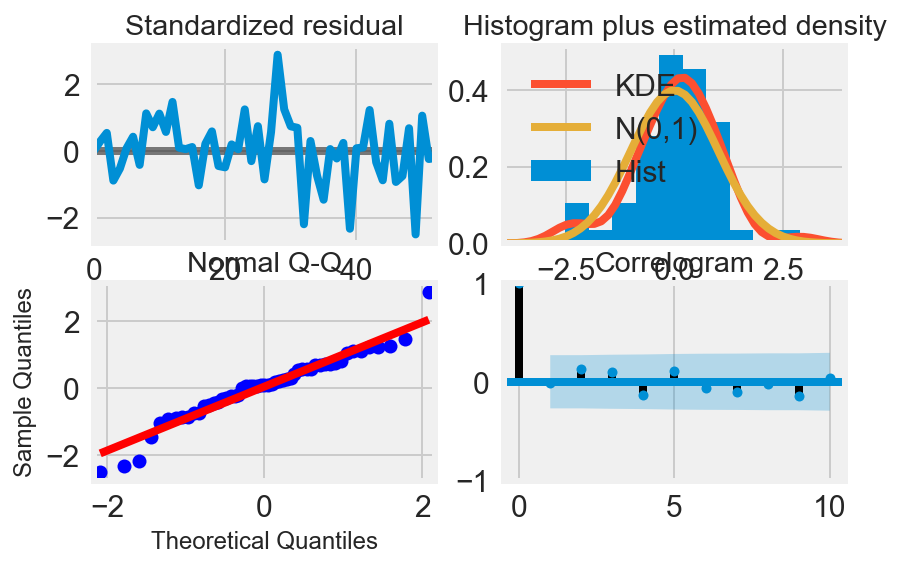

In [25]:
results_ex.plot_diagnostics();

### 8. Describe your diagnostic plots of the residuals. Check for residual autocorrelations.



 Model parameters [0. 0. 0. 0.]


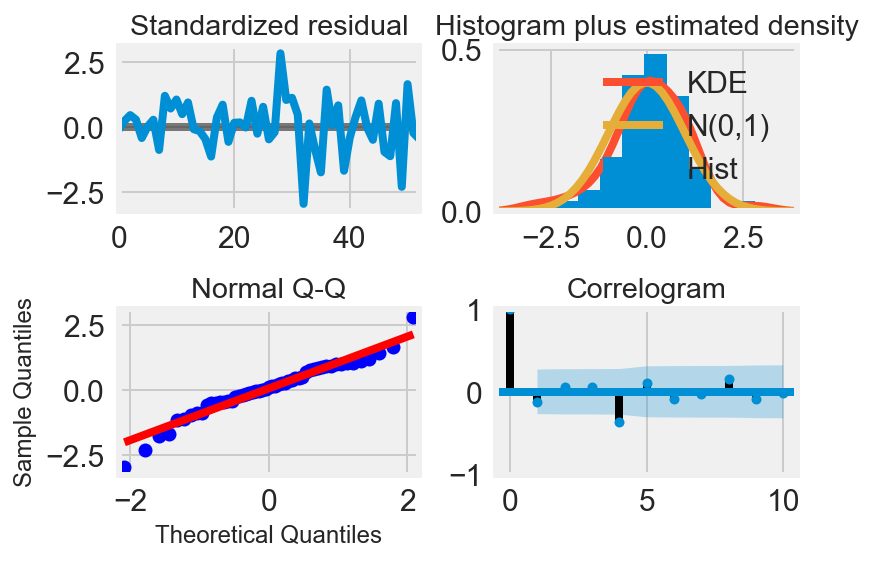



 Model parameters [0. 0. 0. 1.]


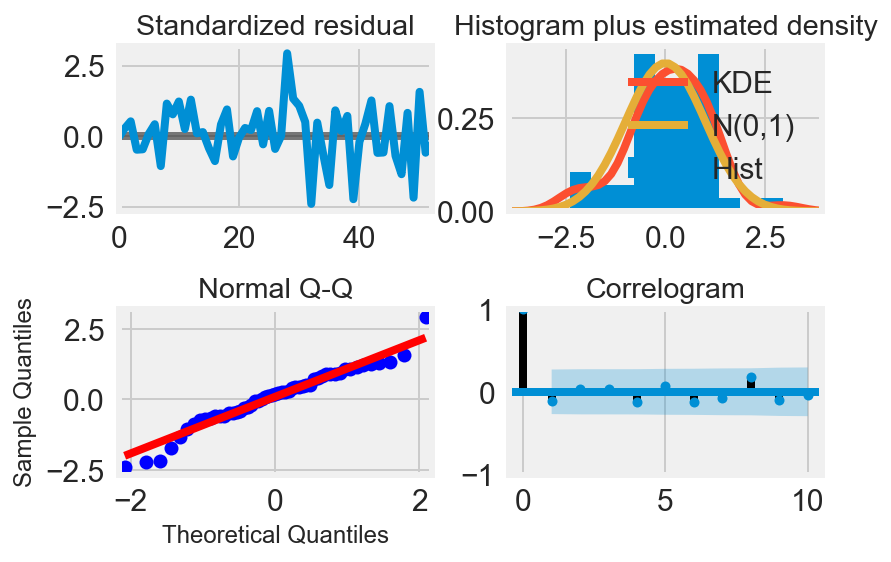



 Model parameters [0. 0. 1. 0.]


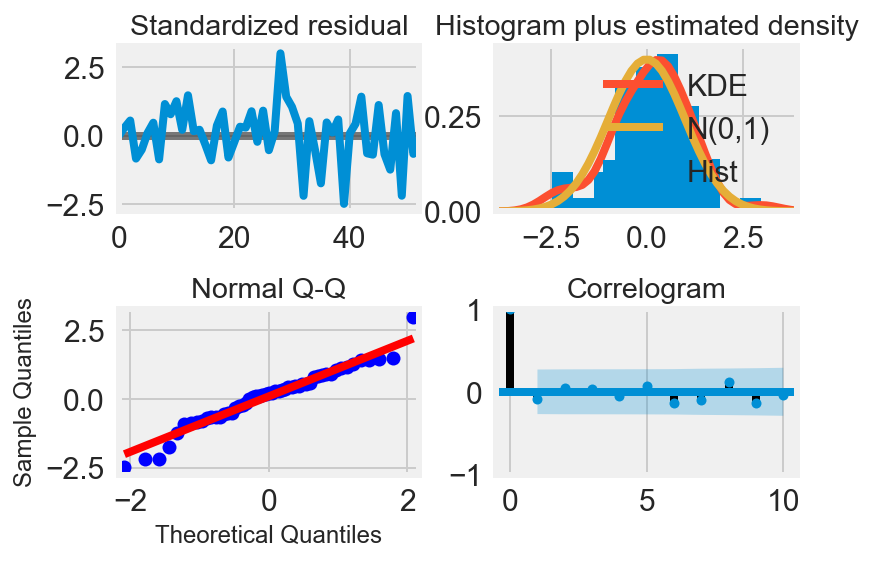



 Model parameters [0. 0. 1. 1.]


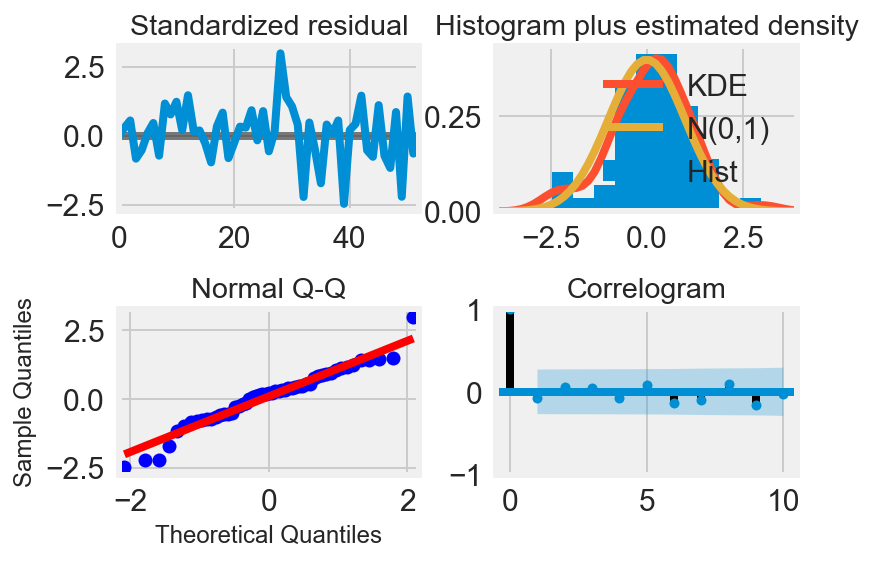



 Model parameters [0. 0. 2. 0.]


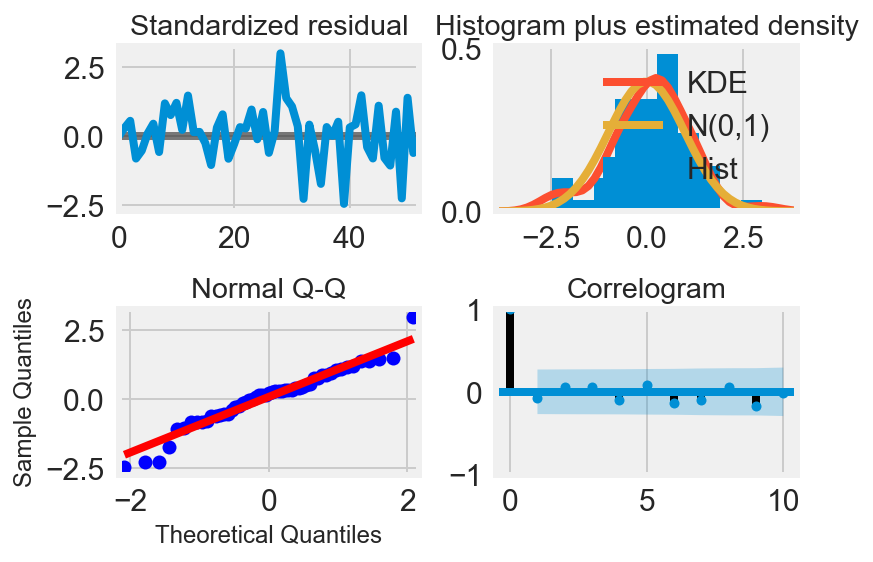



 Model parameters [0. 0. 2. 1.]


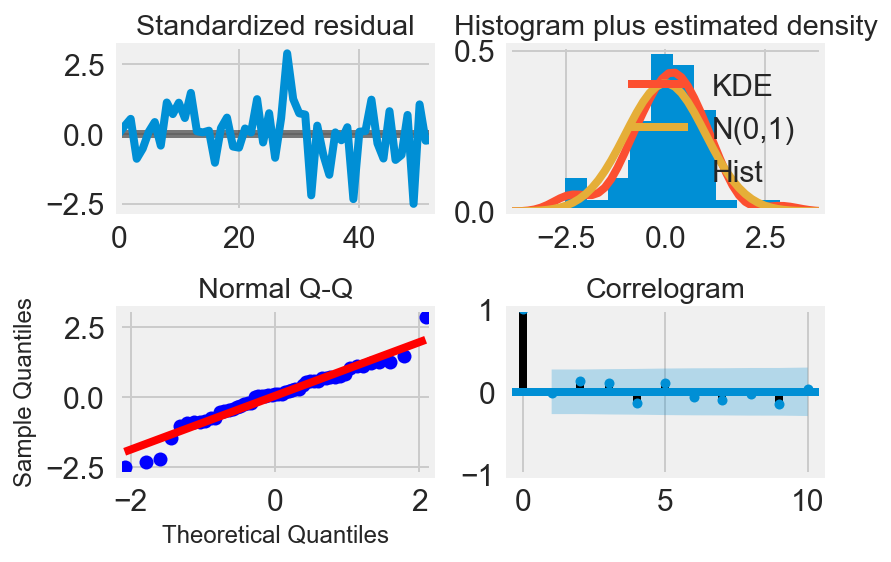



 Model parameters [0. 1. 0. 0.]


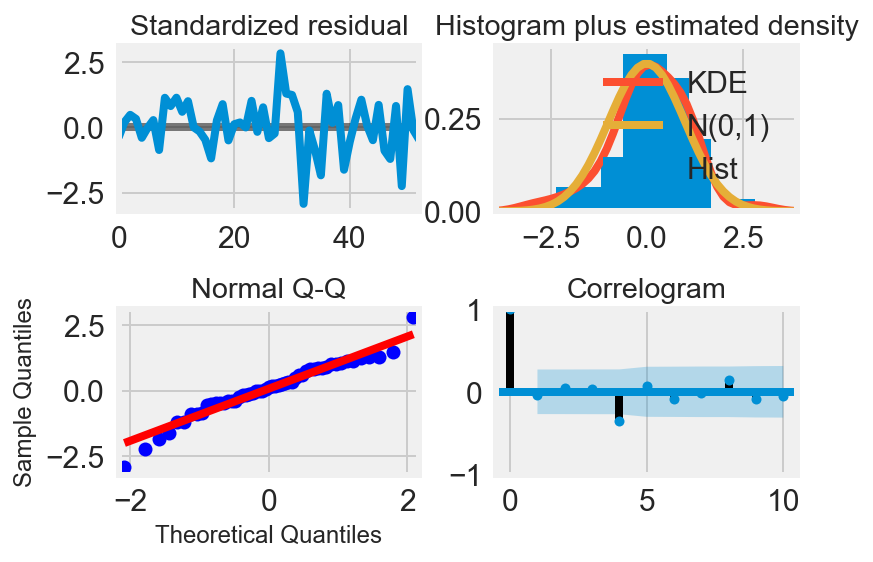



 Model parameters [0. 1. 0. 1.]


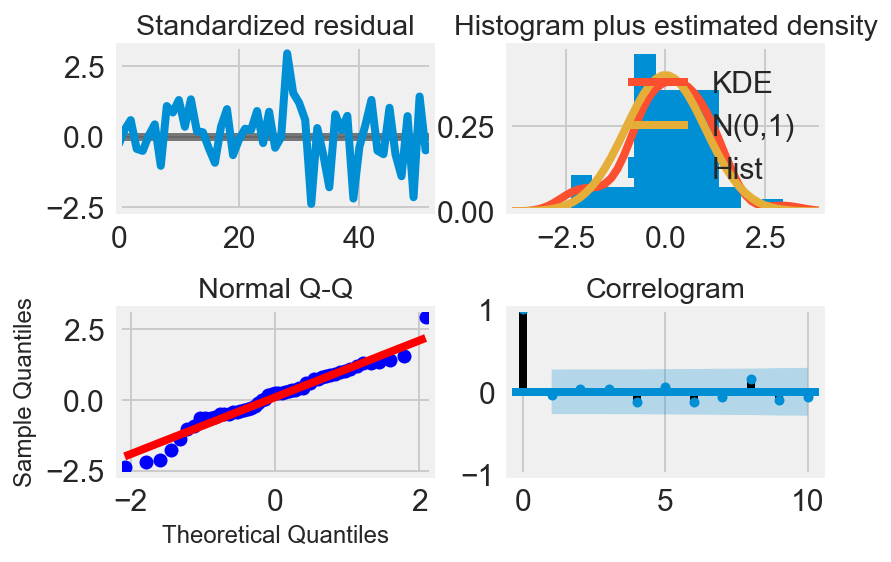



 Model parameters [0. 1. 1. 0.]


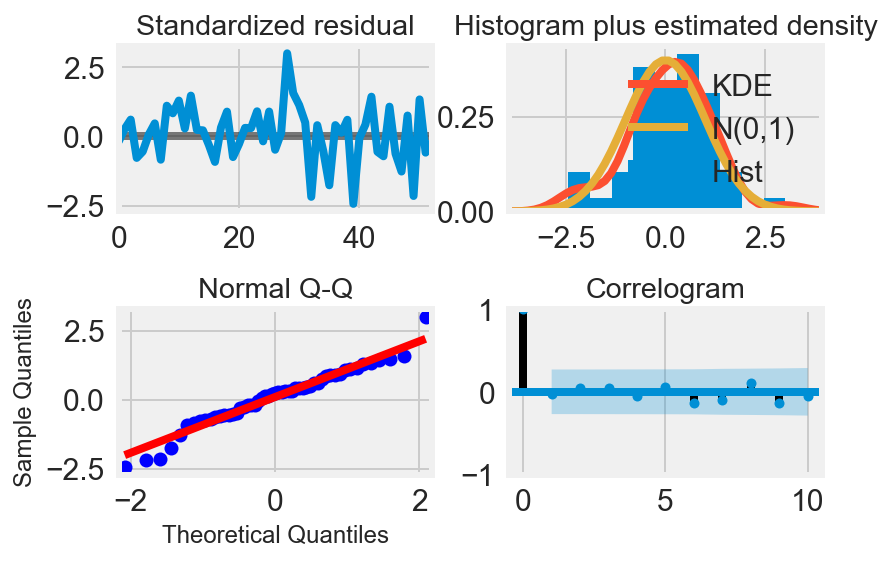



 Model parameters [0. 1. 1. 1.]


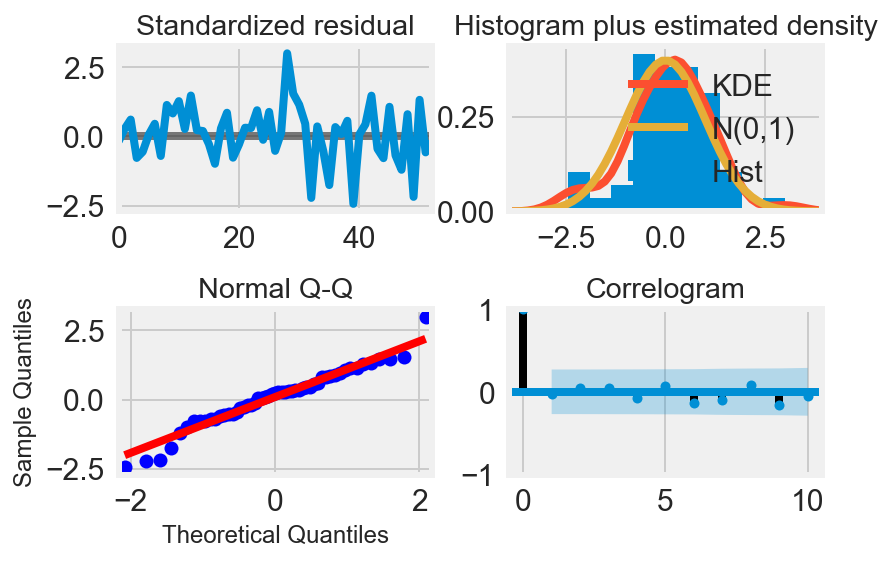



 Model parameters [0. 1. 2. 0.]


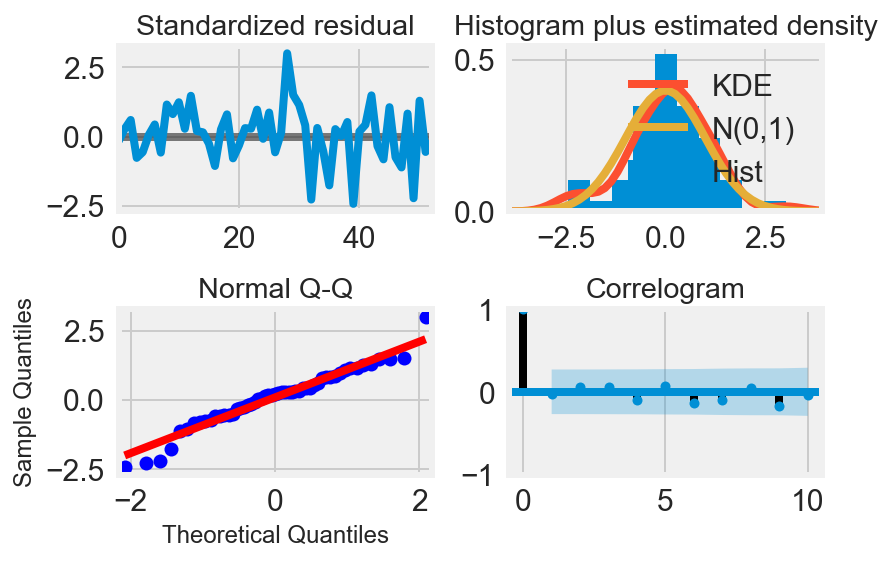



 Model parameters [0. 1. 2. 1.]


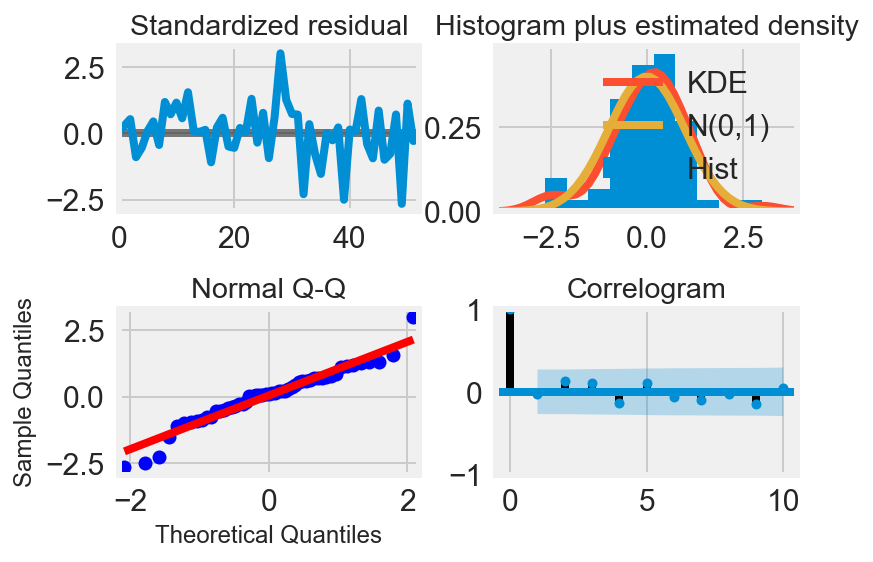



 Model parameters [1. 0. 0. 0.]


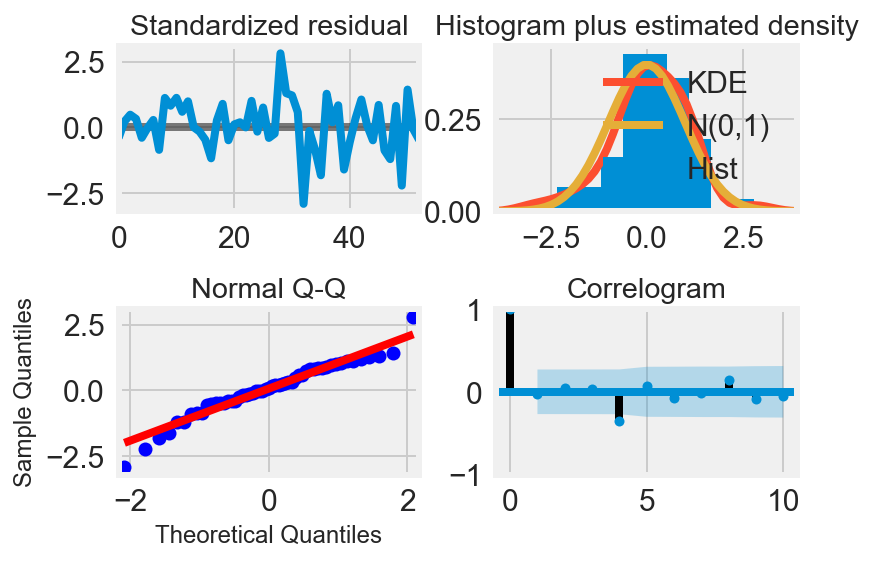



 Model parameters [1. 0. 0. 1.]


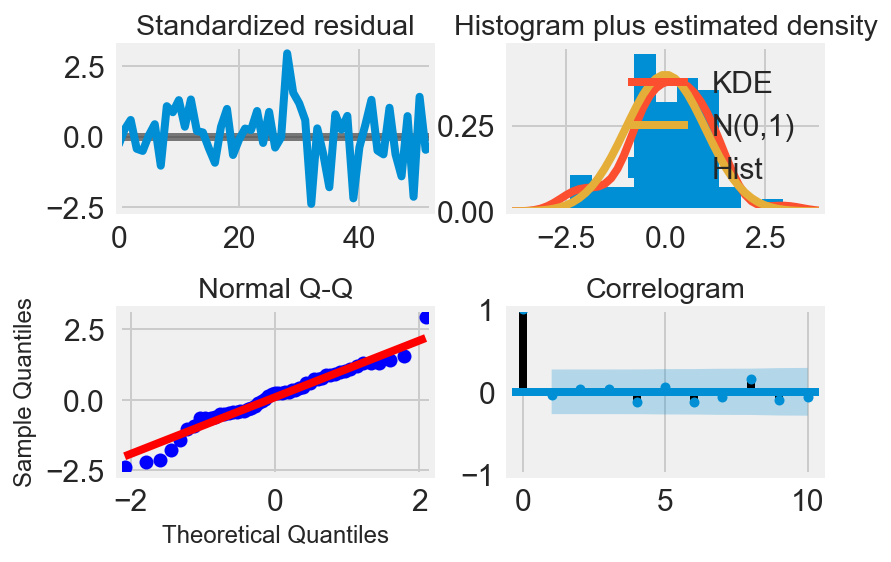



 Model parameters [1. 0. 1. 0.]


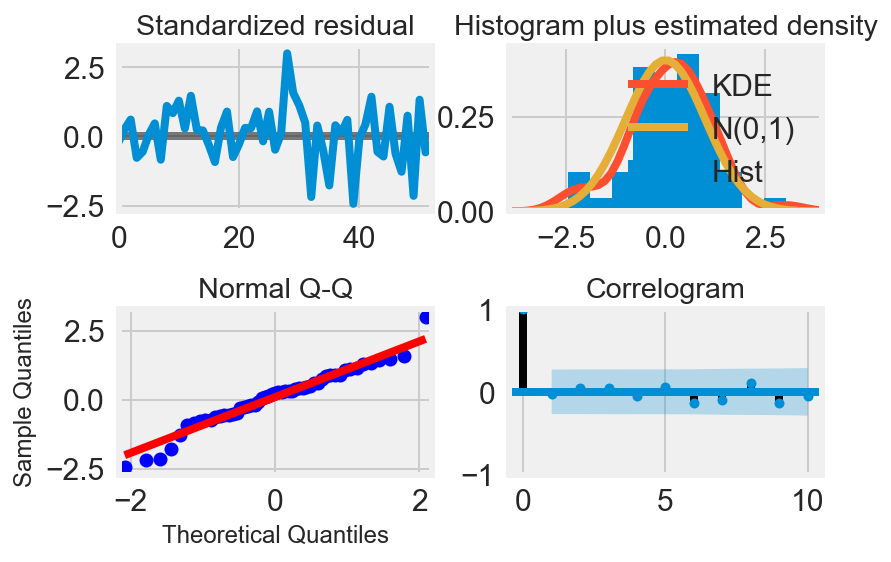



 Model parameters [1. 0. 1. 1.]


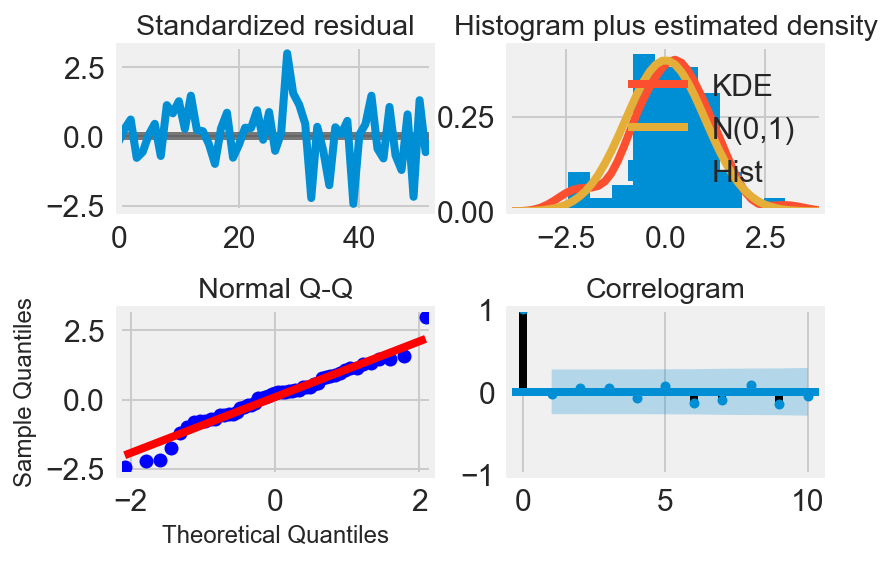



 Model parameters [1. 0. 2. 0.]


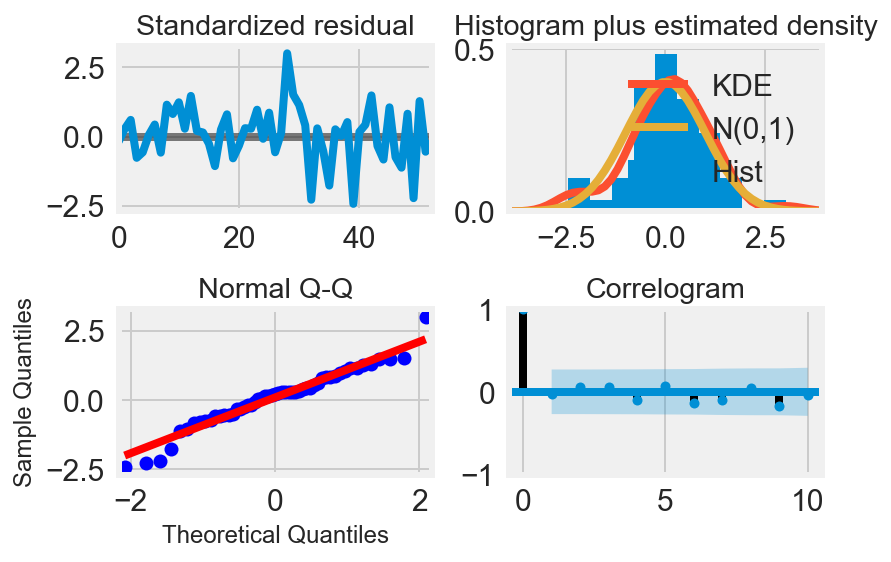



 Model parameters [1. 0. 2. 1.]


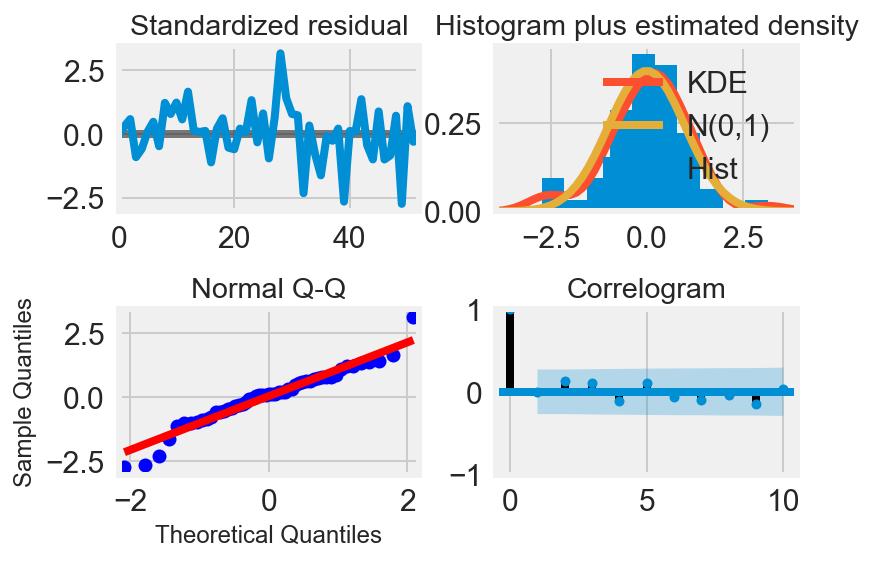



 Model parameters [1. 1. 0. 0.]


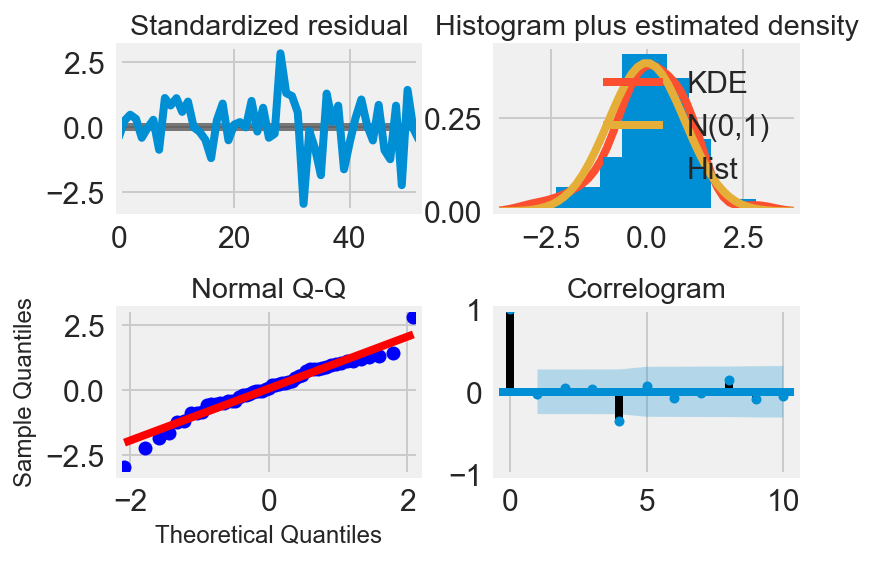



 Model parameters [1. 1. 0. 1.]


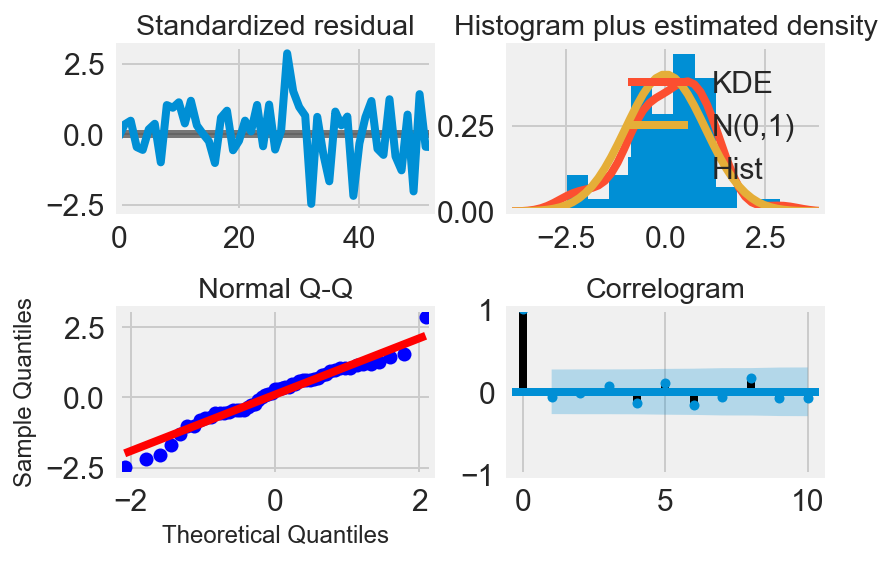



 Model parameters [1. 1. 1. 0.]


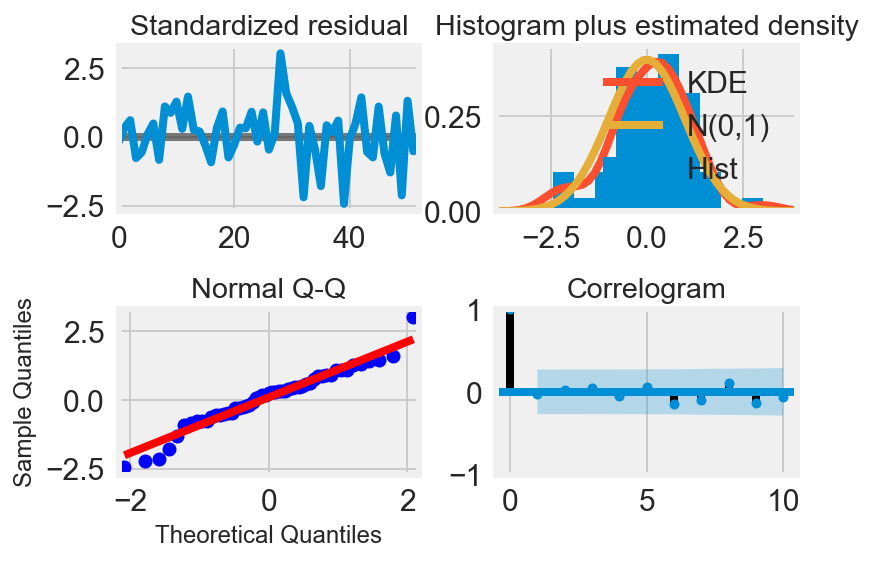



 Model parameters [1. 1. 1. 1.]


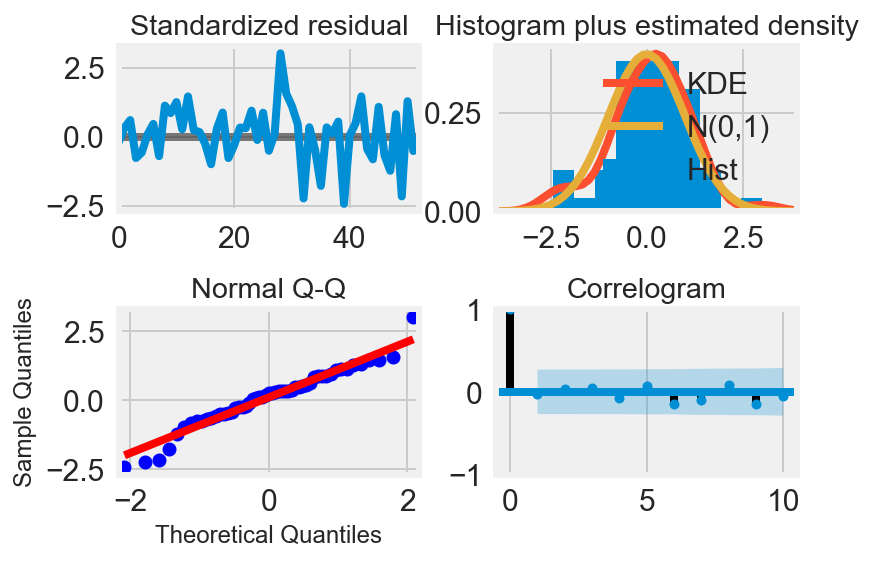



 Model parameters [1. 1. 2. 0.]


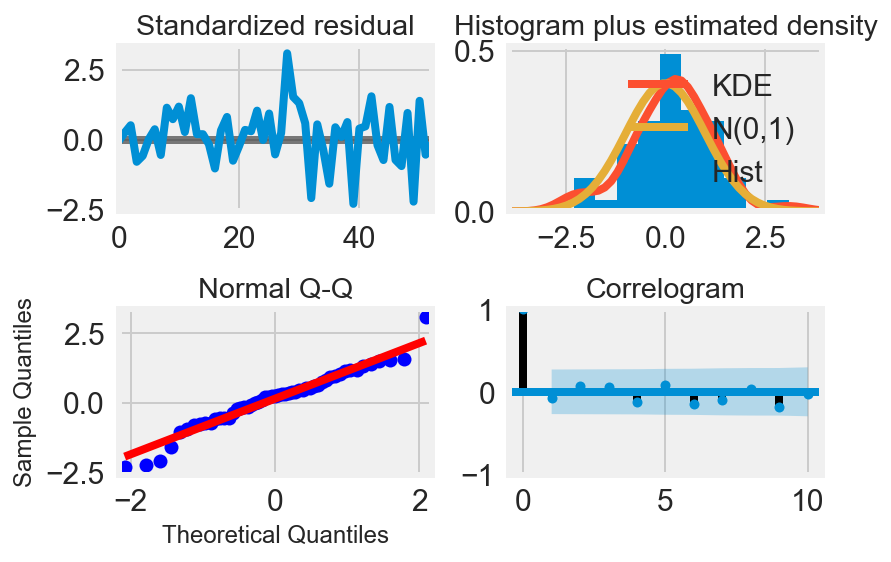



 Model parameters [2. 0. 0. 0.]


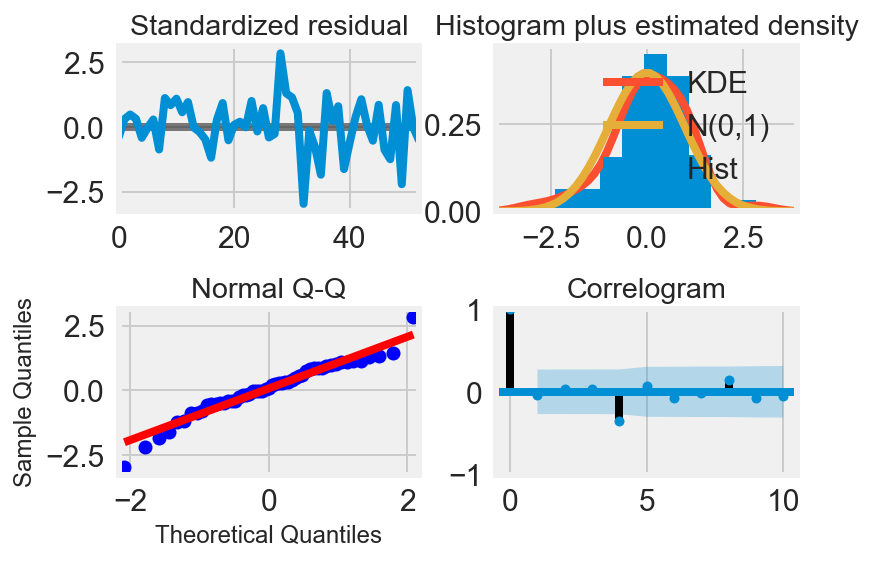



 Model parameters [2. 0. 0. 1.]


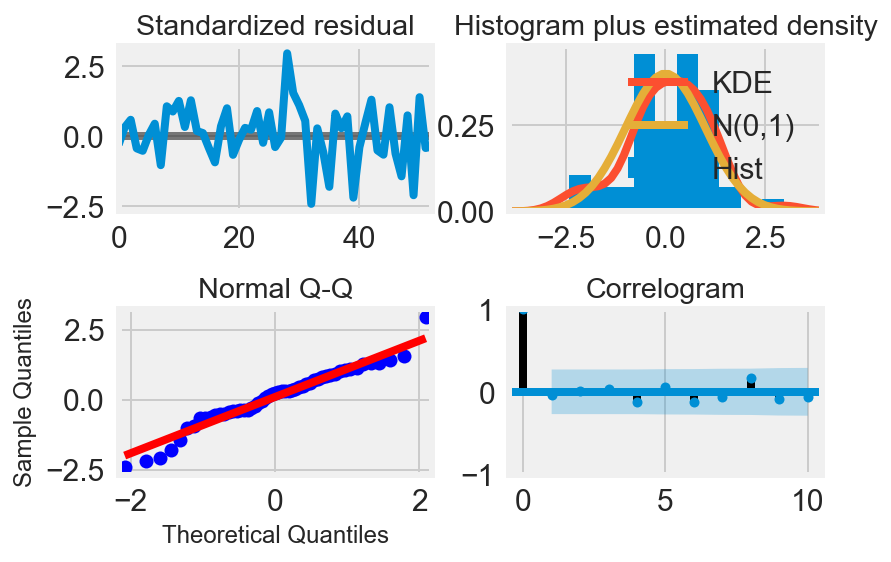



 Model parameters [2. 0. 1. 0.]


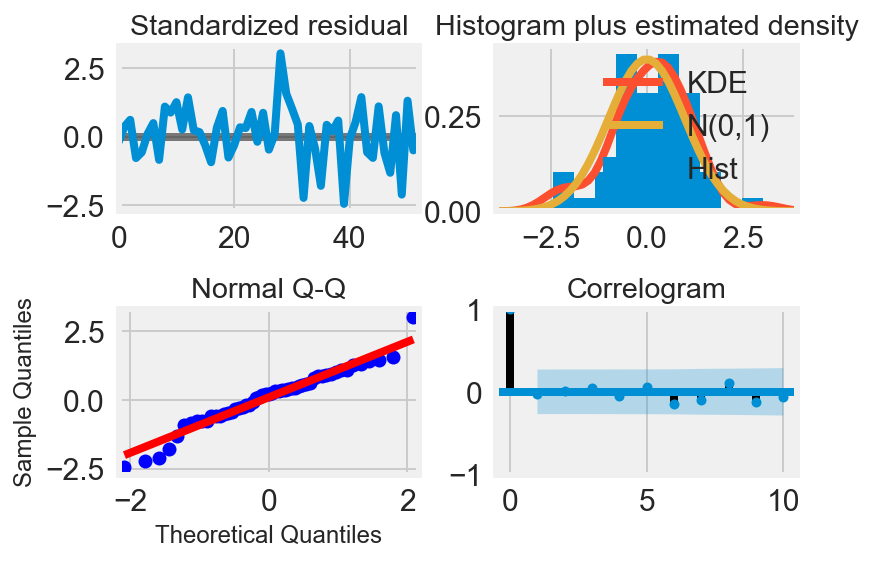



 Model parameters [2. 0. 1. 1.]


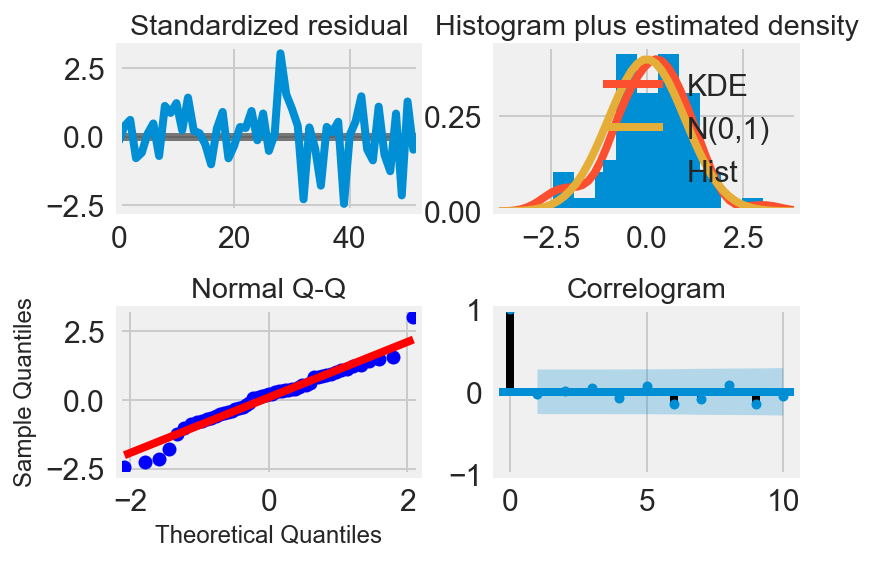



 Model parameters [2. 0. 2. 0.]


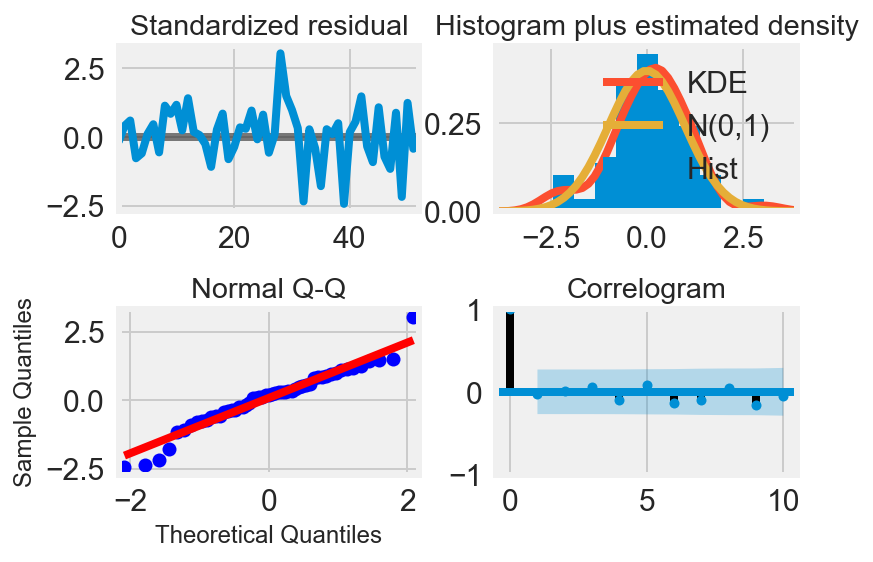



 Model parameters [2. 0. 2. 1.]


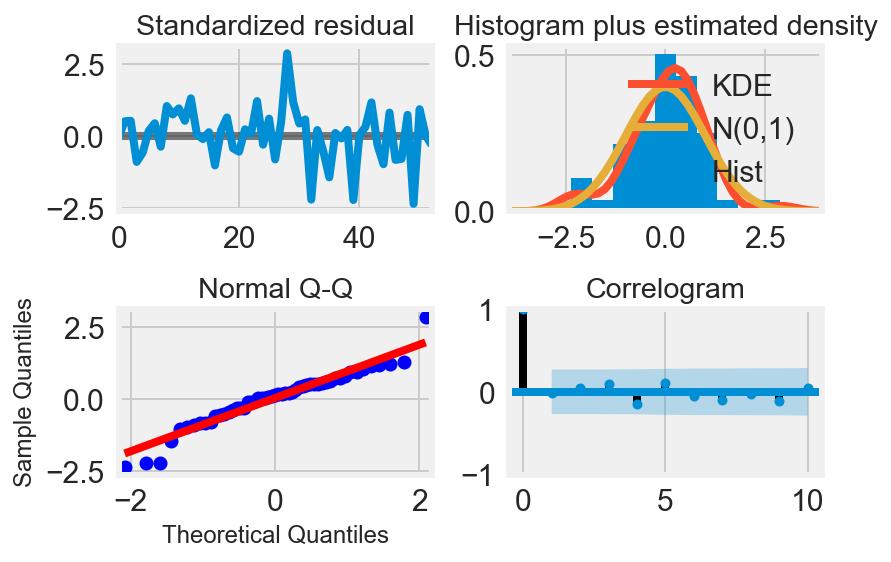

In [26]:
for i in range(len(results)): 
    print("\n\n Model parameters {}".format(results_scores[i][:4]))
    results[i].plot_diagnostics()
    plt.tight_layout()
    plt.show()

### 9. Obtain fitted values with one-step ahead forecasts, in-sample forecasts and out-of sample forecasts. Compare the forecasts of different models.

In [27]:
def ts_fit_plot(i,results,ts,dates,pred_len,forecast_len):
    
    forecast_times = pd.date_range(str(dates[-1]), periods=72, freq='Q')
    sarima_forecasts = results[i].forecast(20)

    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(ts,color='darkred',ls='--')
    ax.plot(dates[3:],results[i].predict(dynamic=False)[3:], lw=4, color='grey', ls='-',alpha=0.5)
    ax.plot(dates[pred_len:],results[i].predict(pred_len,dynamic=False), lw=4, color='darkblue', ls='--')
    ax.plot(forecast_times[:forecast_len], sarima_forecasts, lw=4, color='darkblue')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
def ts_forecast_plot(i,results,ts,dates,forecast_len):
    forecast_times = pd.date_range(str(dates[-1]), periods=72, freq='Q')
    sarima_forecasts = results[i].forecast(20)

    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(forecast_times[:forecast_len], sarima_forecasts, lw=4, color='darkblue')
    plt.xticks(rotation=45)
    plt.show()

0


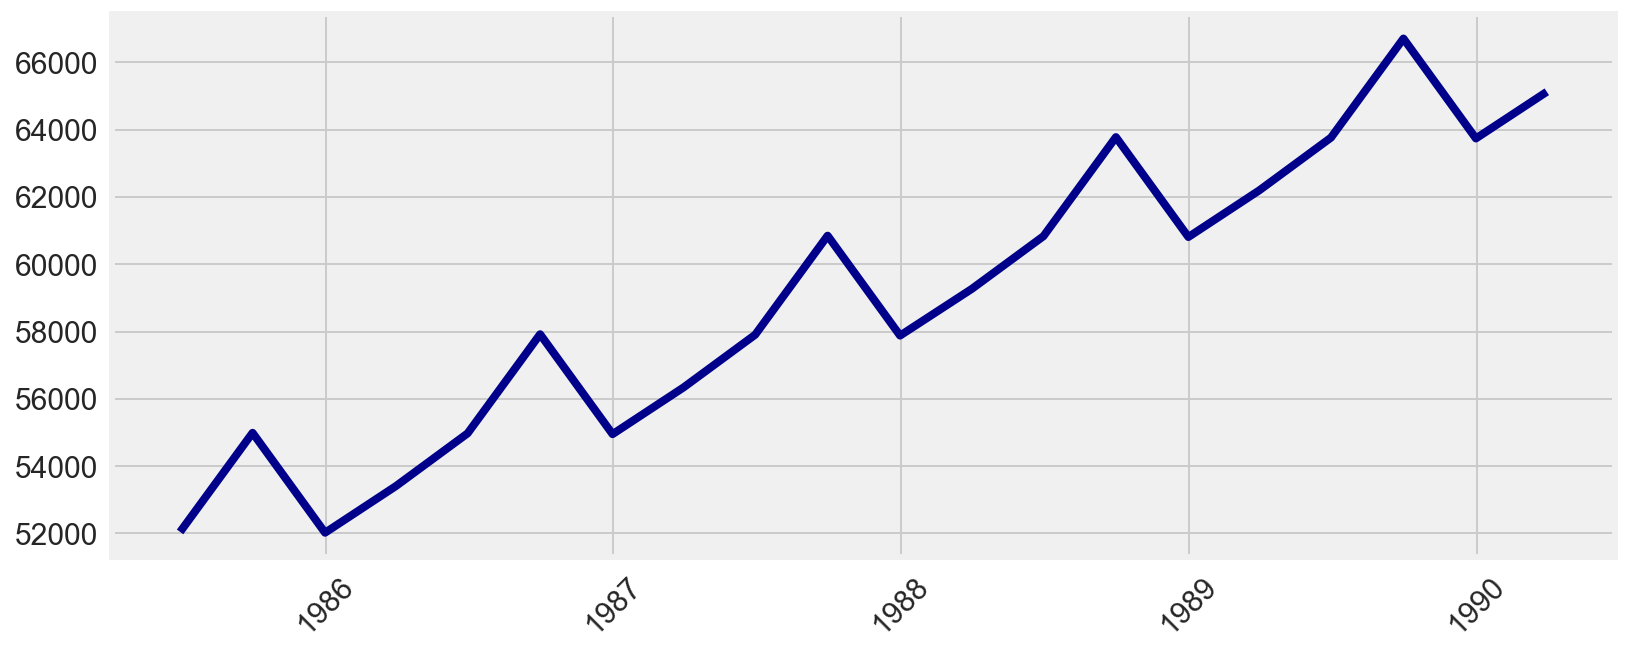

1


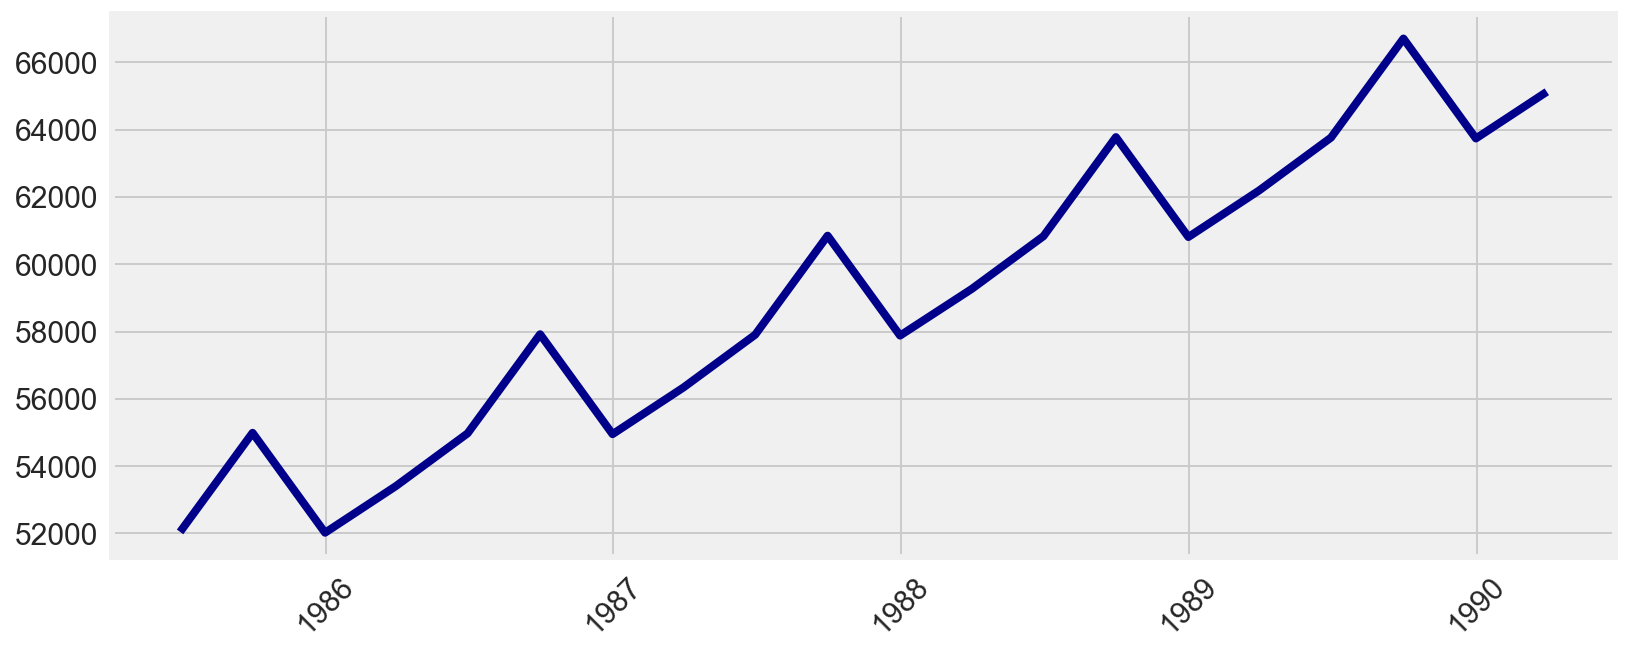

2


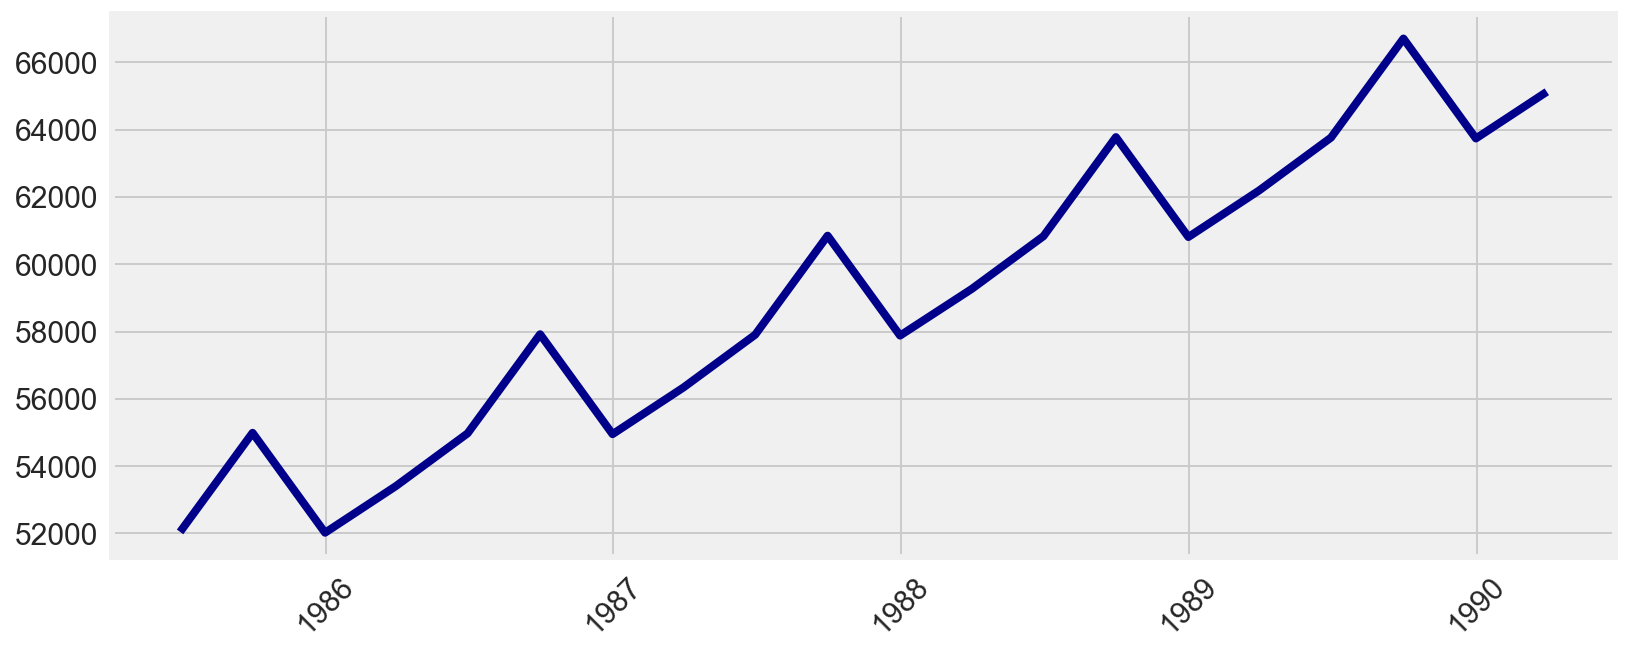

3


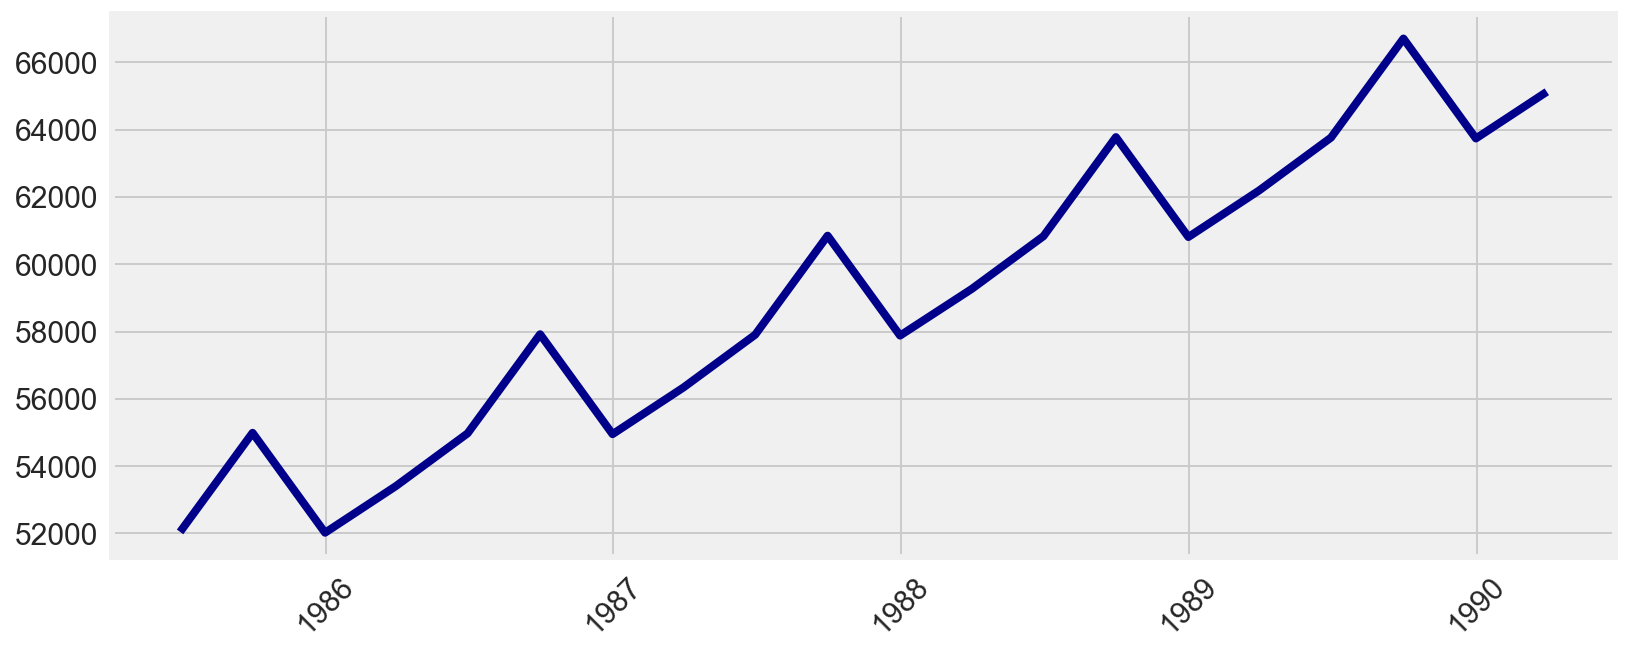

In [29]:
for i in range(4):
    print(i)
    ts_forecast_plot(0,results,df.consumption,df.index.values,20)

0


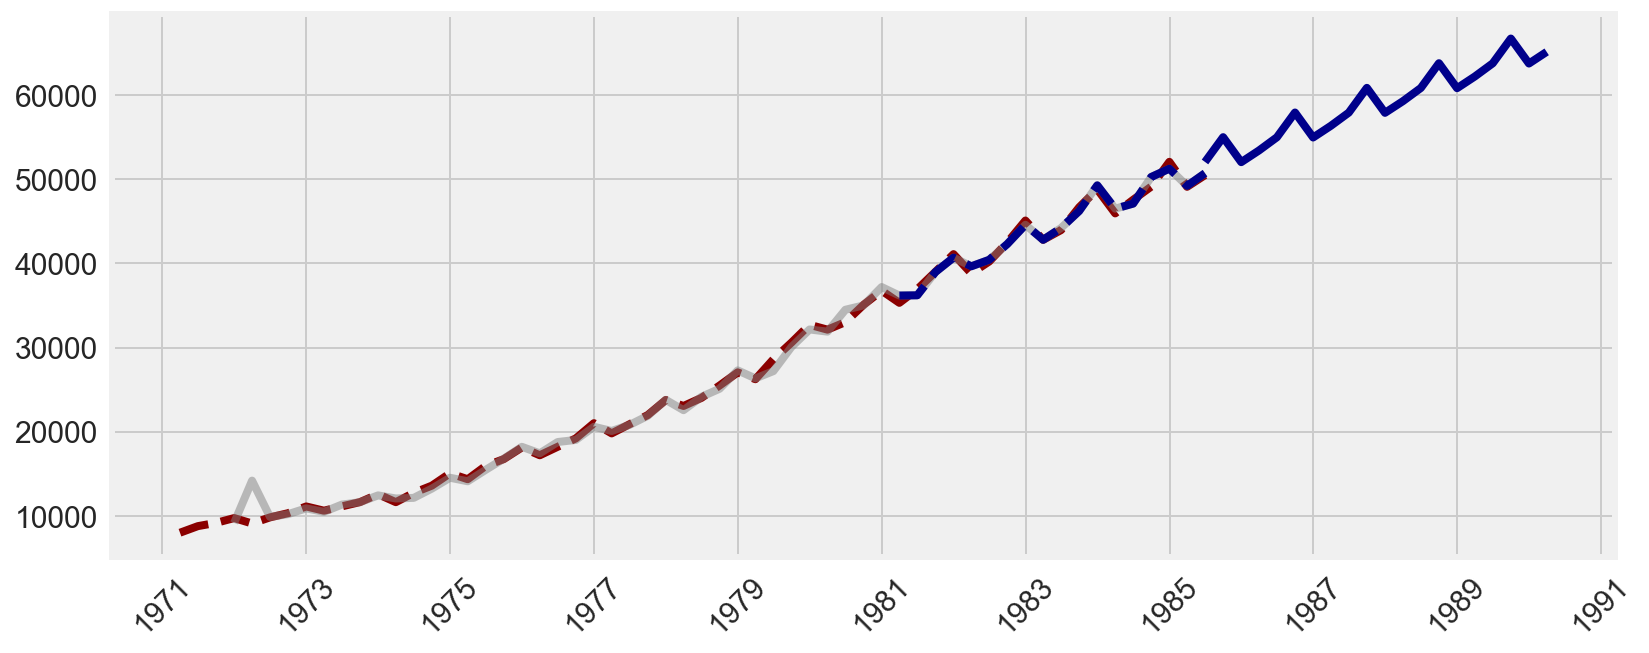

1


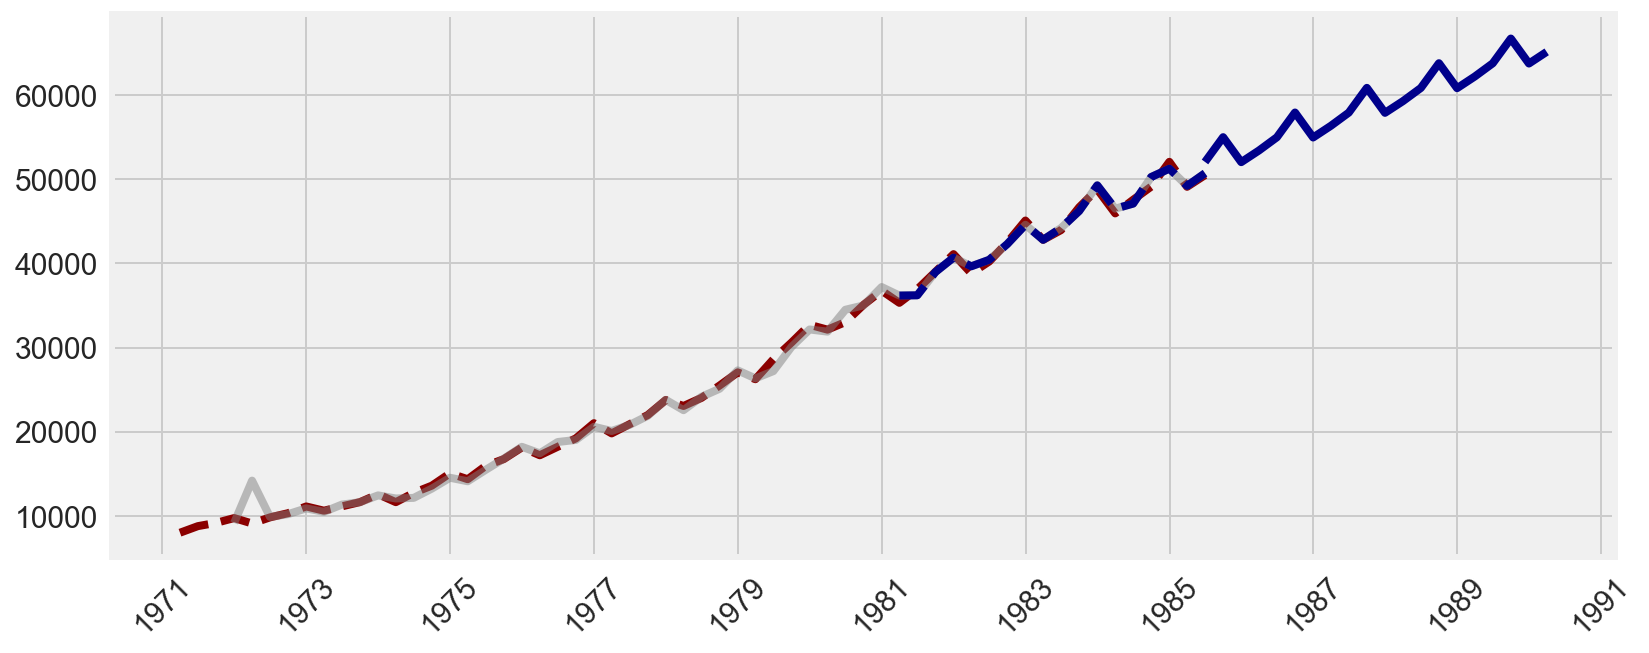

2


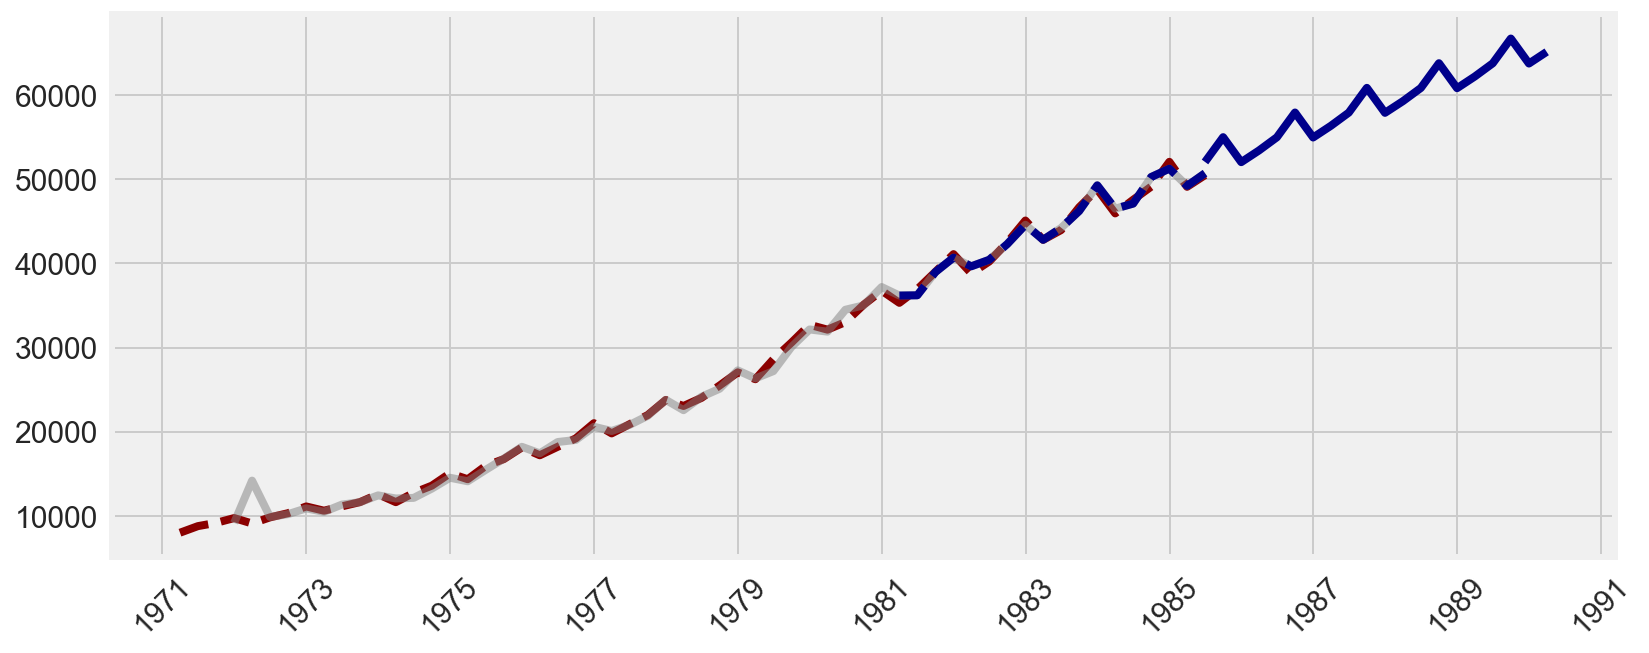

3


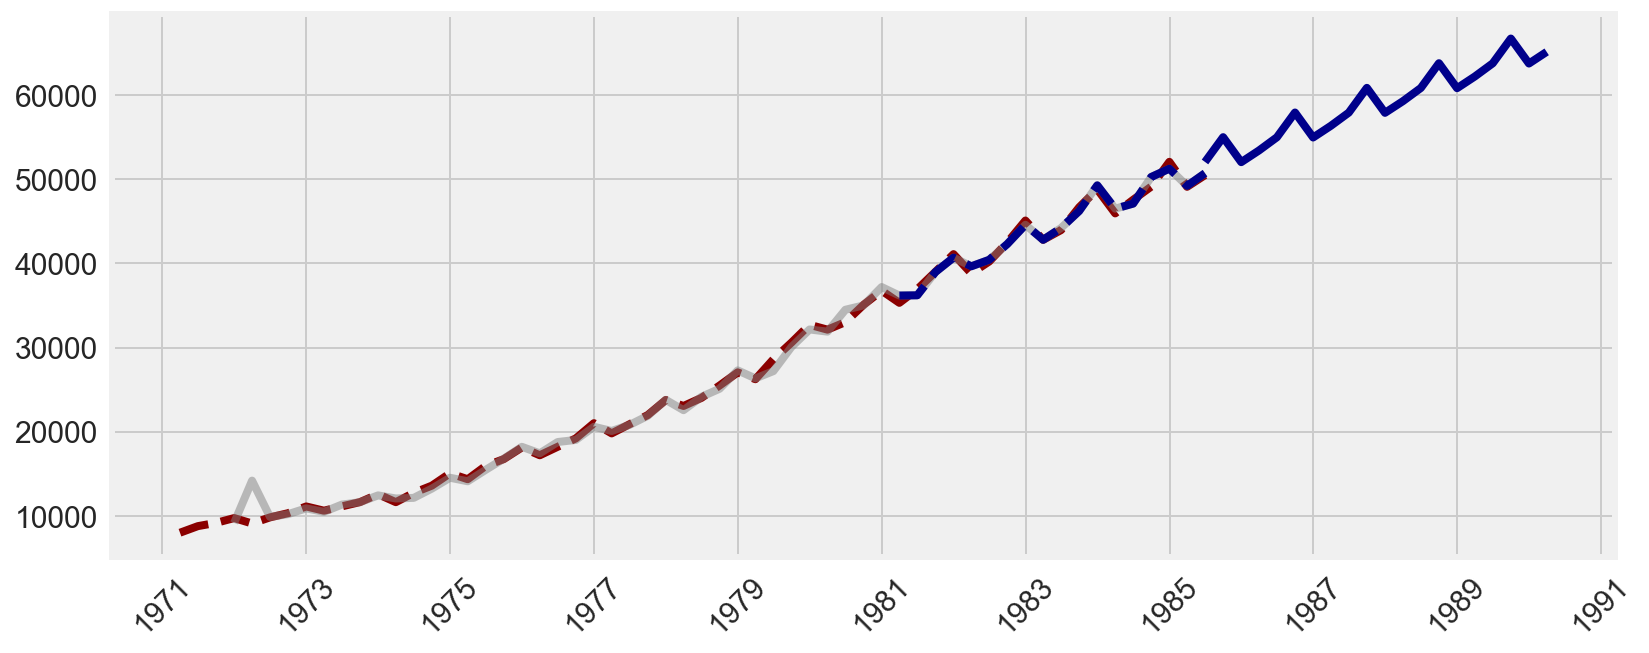

In [30]:
for i in range(4):
    print(i)
    ts_fit_plot(0,results,df.consumption,df.index.values,40,20)

In [31]:
for i in range(len(results)):
    print(results_scores[i][:4], results[i].params)

[0. 0. 0. 0.] [245454.47409654]
[0. 0. 0. 1.] [-2.54307436e-01  2.17792104e+05]
[0. 0. 1. 0.] [-3.36407004e-01  2.07040841e+05]
[0. 0. 1. 1.] [-4.49147642e-01  1.28403762e-01  2.06595338e+05]
[0. 0. 2. 0.] [-2.99865330e-01  8.92017711e-02  2.06030760e+05]
[0. 0. 2. 1.] [ 5.73890605e-01  4.25828231e-01 -9.91974147e-01  1.95032151e+05]
[0. 1. 0. 0.] [-8.68390837e-02  2.42599669e+05]
[0. 1. 0. 1.] [-7.27839595e-02 -2.52214429e-01  2.16204234e+05]
[0. 1. 1. 0.] [-5.22830437e-02 -3.29893342e-01  2.06492932e+05]
[0. 1. 1. 1.] [-5.00260042e-02 -4.44513372e-01  1.29733045e-01  2.06057369e+05]
[0. 1. 2. 0.] [-4.48524358e-02 -2.96658068e-01  8.47137875e-02  2.05539414e+05]
[0. 1. 2. 1.] [ 1.63121167e-02  5.57130500e-01  4.42610923e-01 -9.91947014e-01
  1.75088769e+05]
[1. 0. 0. 0.] [-9.14407486e-02  2.46827552e+05]
[1. 0. 0. 1.] [-7.61976651e-02 -2.51762366e-01  2.16068808e+05]
[1. 0. 1. 0.] [-5.58891960e-02 -3.29411876e-01  2.06419700e+05]
[1. 0. 1. 1.] [-5.41440962e-02 -4.44677651e-01  1.30481